## Descripcion:
Hemos escogido el dataset statlog_german_credit_data de fetch_ucirepo.  
Este dataset consiste de 20 variables mixtas numericas y categóricas.  
El problema es de clasificación binaria en el que se tiene que intentar predecir si hay que ceder el crédito o no segun las diferentes carácterísticas del prestario.


In [21]:

#install libraries

!pip3 install matplotlib  --upgrade --quiet
!pip3 install seaborn  --upgrade --quiet
!pip3 install scikit-learn --upgrade --quiet
!pip3 install pandas --upgrade --quiet
!pip3 install numpy  --upgrade --quiet
!pip install ucimlrepo --upgrade --quiet
!pip install missingno --upgrade --quiet

In [22]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [23]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

Cambiando los nombres a las variables y a los posibles valores de las variables categóricas para la visualización

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Combinar características y objetivo en un solo DataFrame
df = pd.concat([X, y], axis=1)

# Obtener el DataFrame de variables
variables_df = statlog_german_credit_data.variables

# Filtrar variables_df para excluir 'class'
variables_to_rename = variables_df[variables_df['name'] != 'class']

# Reemplazar espacios por guiones bajos en las descripciones
variables_to_rename['description_underscore'] = variables_to_rename['description'].str.replace(' ', '_')

# Crear un diccionario que mapee 'name' a 'description_underscore', excluyendo 'class'
name_to_description = dict(zip(variables_to_rename['name'], variables_to_rename['description_underscore']))

# Renombrar las columnas del DataFrame, excluyendo 'class'
df = df.rename(columns=name_to_description)

# Ahora puedes utilizar las listas de variables actualizadas
numerical_cols_original = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
categorical_cols_original = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10',
                             'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Actualizar las listas con los nuevos nombres
numerical_cols = [name_to_description.get(col, col) for col in numerical_cols_original]
categorical_cols = [name_to_description.get(col, col) for col in categorical_cols_original]

#Se hace para que sea legible los valores de las variables categóricas
mapping_attribute1 = {
    'A11': '... < 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '... >= 200 DM',
    'A14': 'no checking account'
}
mapping_attribute3 = {
    'A30': 'no credits taken/ all credits paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/ other credits existing (not at this bank)'
}
mapping_attribute4 = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}
mapping_attribute6 = {
    'A61': '... < 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '... >= 1000 DM',
    'A65': 'unknown/ no savings account'
}
mapping_attribute7 = {
    'A71': 'unemployed',
    'A72': '... < 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '... >= 7 years'
}
mapping_attribute9 = {
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married',
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
}
mapping_attribute10 = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}
mapping_attribute12 = {
    'A121': 'real estate',
    'A122': 'building society savings/life insurance',
    'A123': 'car or other',
    'A124': 'unknown / no property'
}
mapping_attribute14 = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}
mapping_attribute15 = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}
mapping_attribute17 = {
    'A171': 'unemployed/ unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee / official',
    'A174': 'management/ self-employed/ highly qualified'
}
mapping_attribute19 = {
    'A191': 'none',
    'A192': 'yes, registered under the customer\'s name'
}
mapping_attribute20 = {
    'A201': 'yes',
    'A202': 'no'
}
# Aplicar los mapeos de las variables categoricas al DataFrame para que sea más legible
df['Status_of_existing_checking_account'] = df['Status_of_existing_checking_account'].map(mapping_attribute1)
df['Credit_history'] = df['Credit_history'].map(mapping_attribute3)
df['Purpose'] = df['Purpose'].map(mapping_attribute4)
df['Savings_account/bonds'] = df['Savings_account/bonds'].map(mapping_attribute6)
df['Present_employment_since'] = df['Present_employment_since'].map(mapping_attribute7)
df['Personal_status_and_sex'] = df['Personal_status_and_sex'].map(mapping_attribute9)
df['Other_debtors_/_guarantors'] = df['Other_debtors_/_guarantors'].map(mapping_attribute10)
df['Property'] = df['Property'].map(mapping_attribute12)
df['Other_installment_plans'] = df['Other_installment_plans'].map(mapping_attribute14)
df['Housing'] = df['Housing'].map(mapping_attribute15)
df['Job'] = df['Job'].map(mapping_attribute17)
df['Telephone'] = df['Telephone'].map(mapping_attribute19)
df['foreign_worker'] = df['foreign_worker'].map(mapping_attribute20)

"""
df tiene los valores de las variables categóricas reemplazados por cadenas de texto más descriptivas.
y los nombres de las columnas se han actualizado para que sean más legibles.
"""

num_filas = df.shape[0]

print(f"El número de instancias (filas) es: {num_filas}")

print(f"\nLas primeras 5 filas del DataFrame son: {df.head()}")



El número de instancias (filas) es: 1000

Las primeras 5 filas del DataFrame son:   Status_of_existing_checking_account  Duration  \
0                          ... < 0 DM         6   
1                   0 <= ... < 200 DM        48   
2                 no checking account        12   
3                          ... < 0 DM        42   
4                          ... < 0 DM        24   

                                      Credit_history              Purpose  \
0  critical account/ other credits existing (not ...     radio/television   
1           existing credits paid back duly till now     radio/television   
2  critical account/ other credits existing (not ...            education   
3           existing credits paid back duly till now  furniture/equipment   
4                    delay in paying off in the past            car (new)   

   Credit_amount        Savings_account/bonds Present_employment_since  \
0           1169  unknown/ no savings account           ... >= 7 years   


C:\Users\Guille\AppData\Local\Temp\ipykernel_17544\2294995721.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_to_rename['description_underscore'] = variables_to_rename['description'].str.replace(' ', '_')


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_numerical(df, numerical_cols=None):
    """
    Visualiza variables numéricas mediante histogramas y diagramas de caja.

    Parámetros:
    - df: DataFrame de pandas que contiene los datos.
    - numerical_cols: Lista de nombres de columnas numéricas. Si es None, se detectan automáticamente.
    """
    if numerical_cols is None:
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    for col in numerical_cols:
        plt.figure(figsize=(8, 4))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        # Diagrama de caja
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Diagrama de caja de {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

def visualize_categorical(df, categorical_cols):
    """
    Visualiza variables categóricas mediante gráficos de barras.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        order = df[col].value_counts().index  # Ordenar por frecuencia

        # Obtener una paleta de colores con tantos colores como categorías
        palette = sns.color_palette('viridis', n_colors=len(order))

        # Crear el gráfico sin especificar 'palette' ni 'hue'
        ax = sns.countplot(x=col, data=df, order=order)

        # Asignar los colores manualmente a cada barra
        for i, patch in enumerate(ax.patches):
            patch.set_facecolor(palette[i % len(palette)])

        plt.title(f'Conteo de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



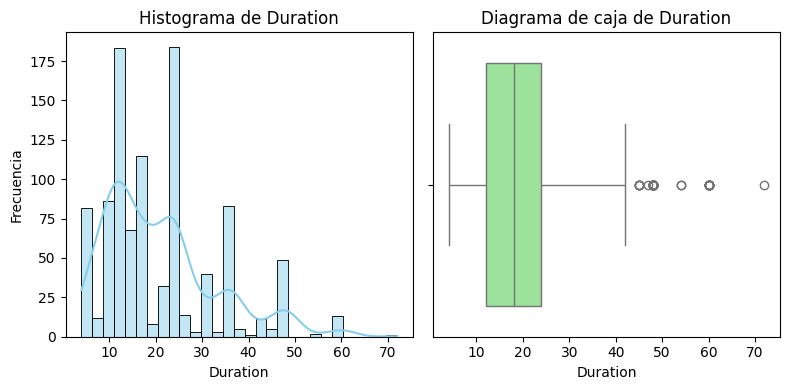

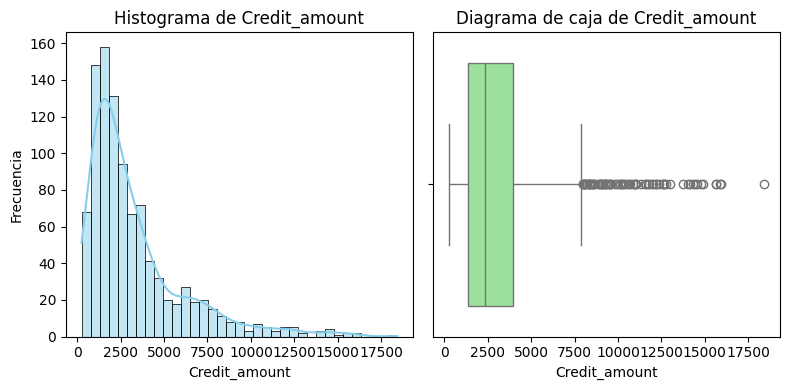

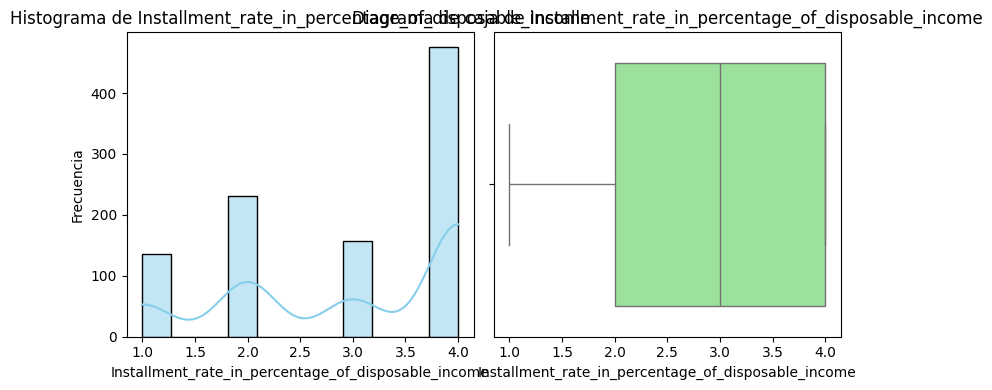

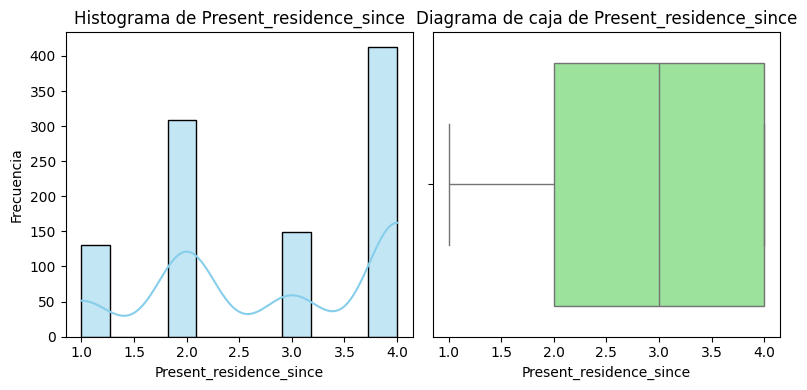

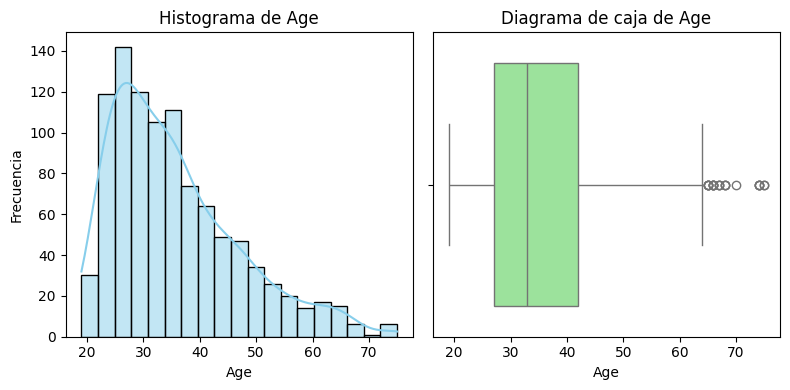

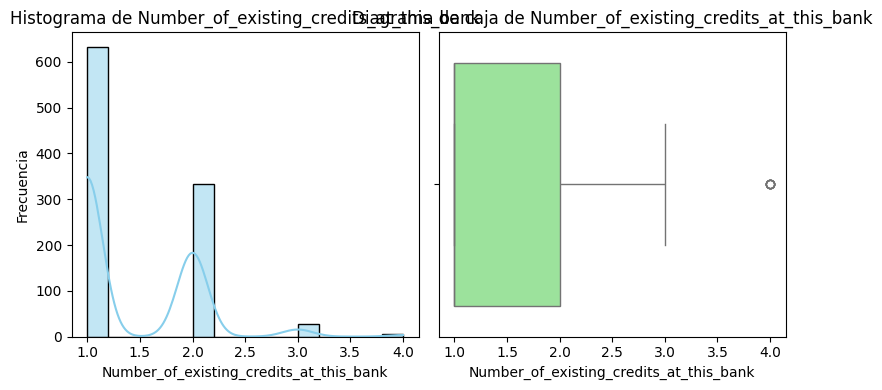

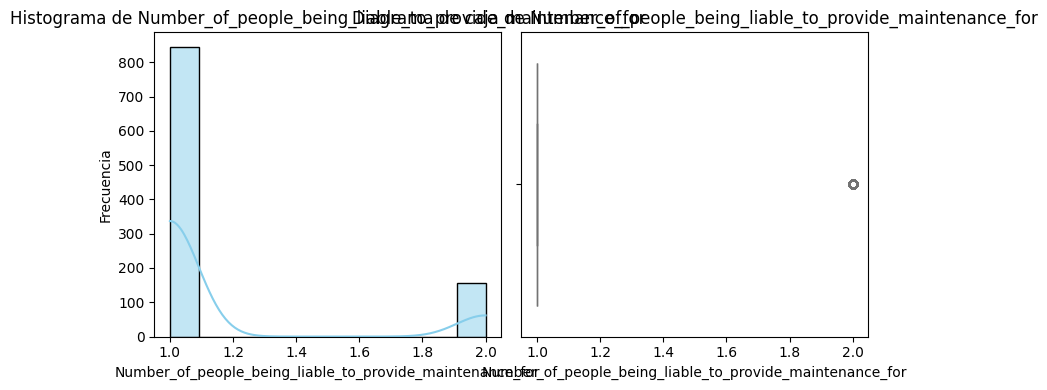

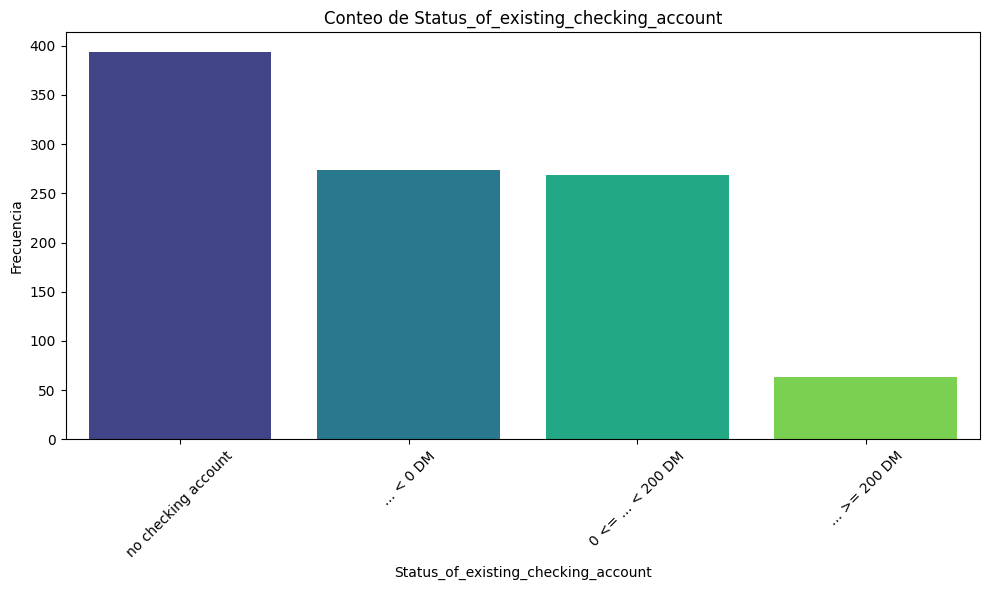

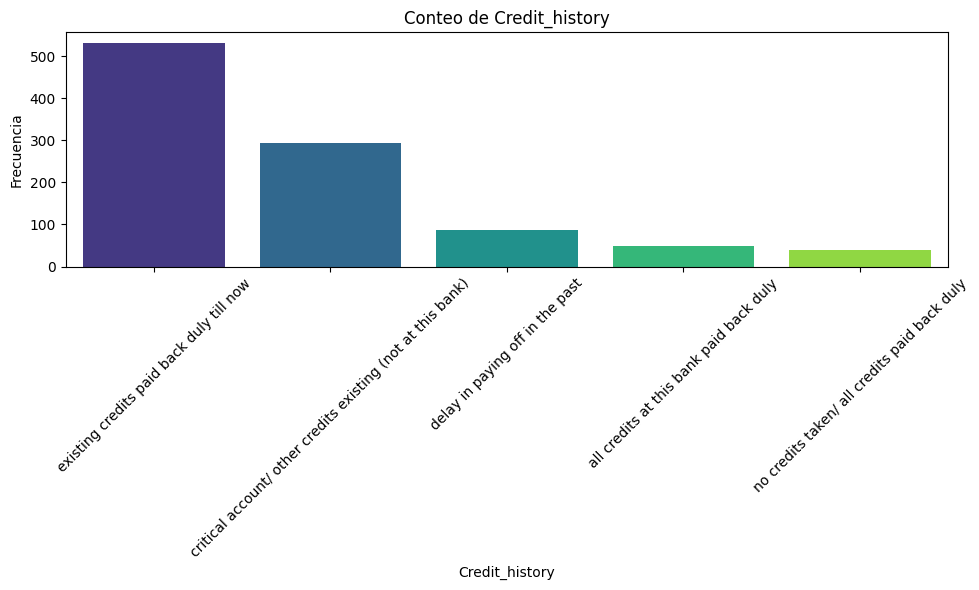

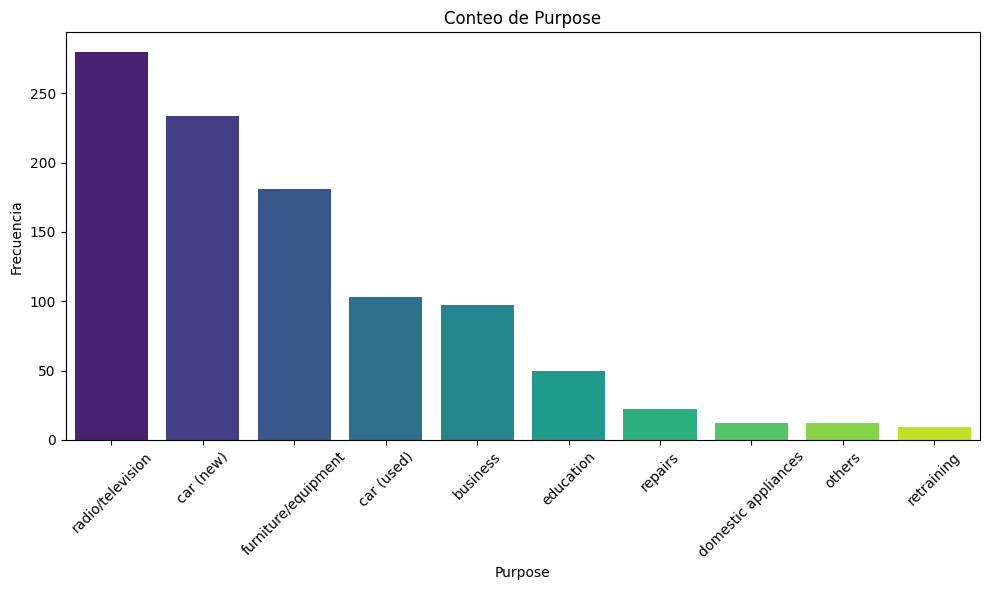

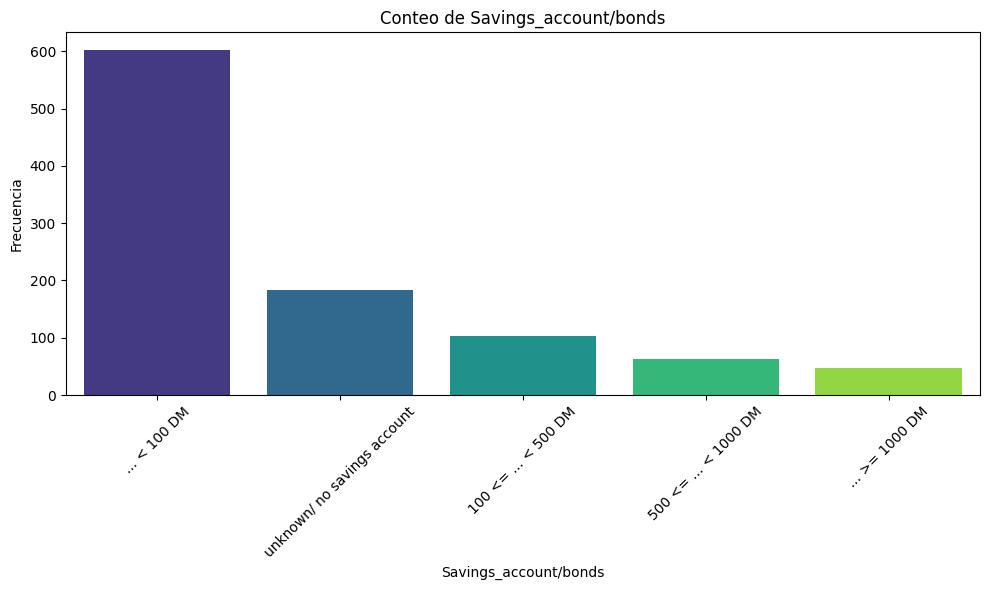

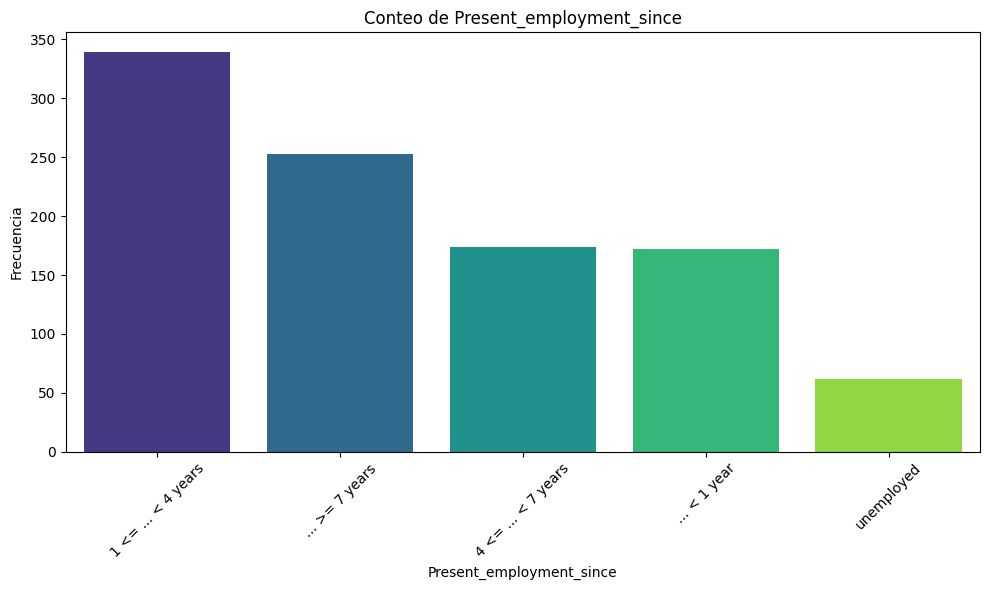

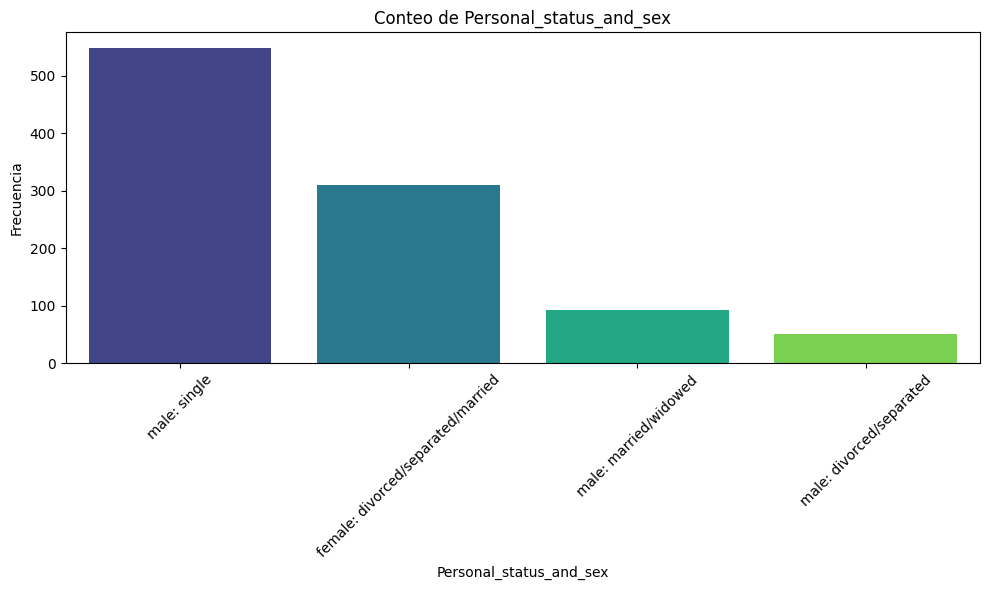

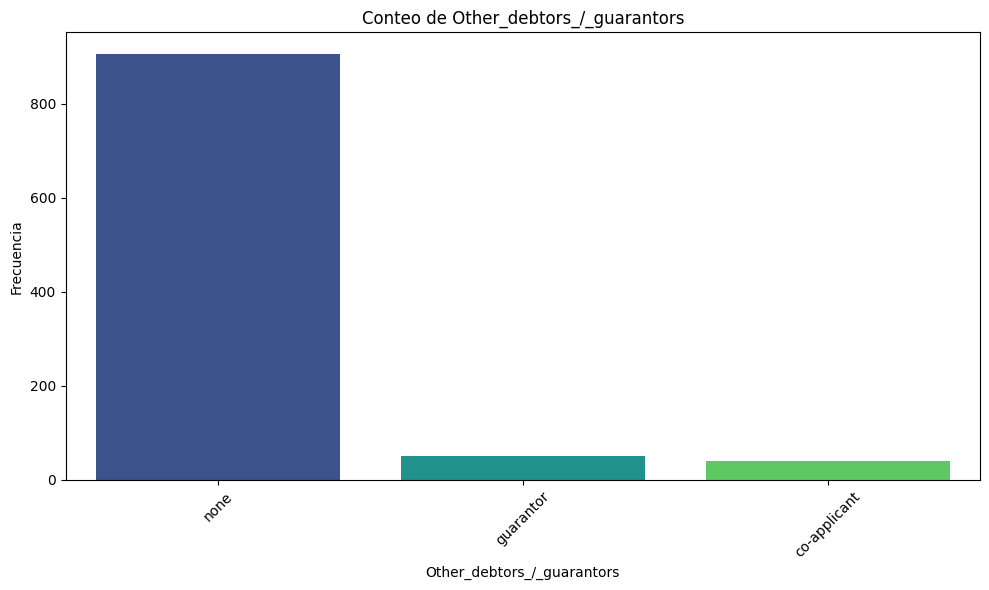

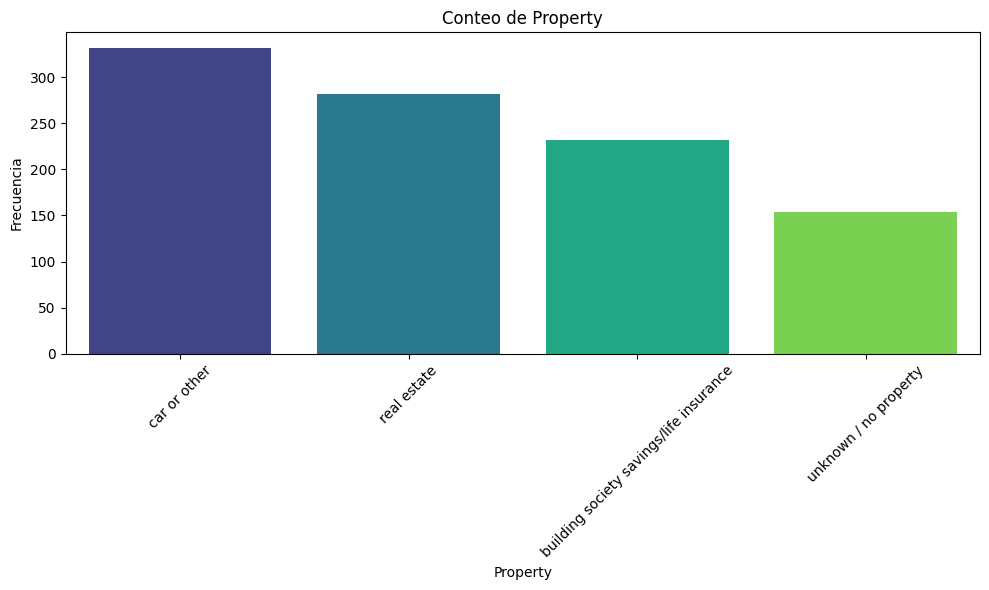

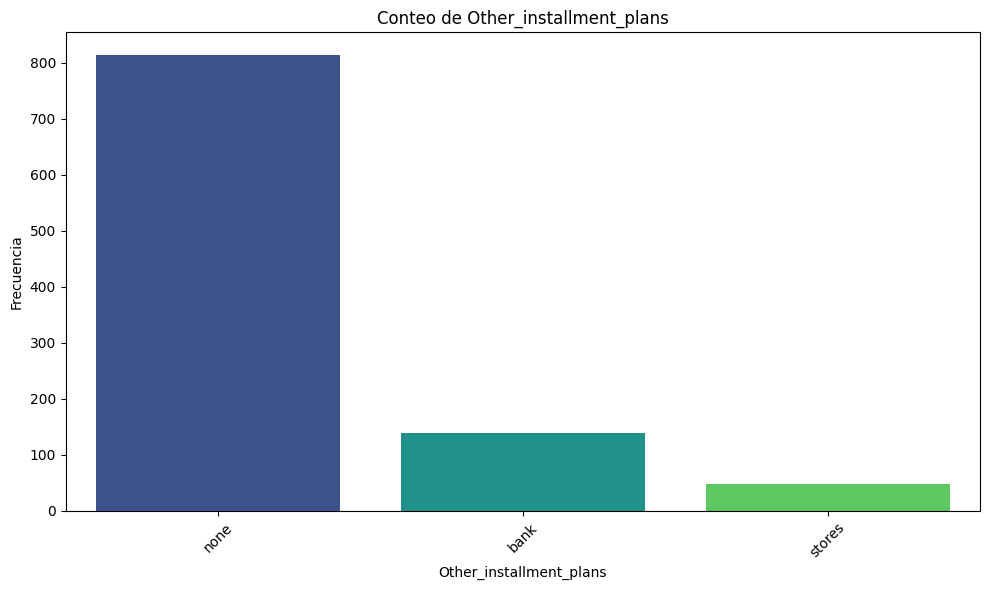

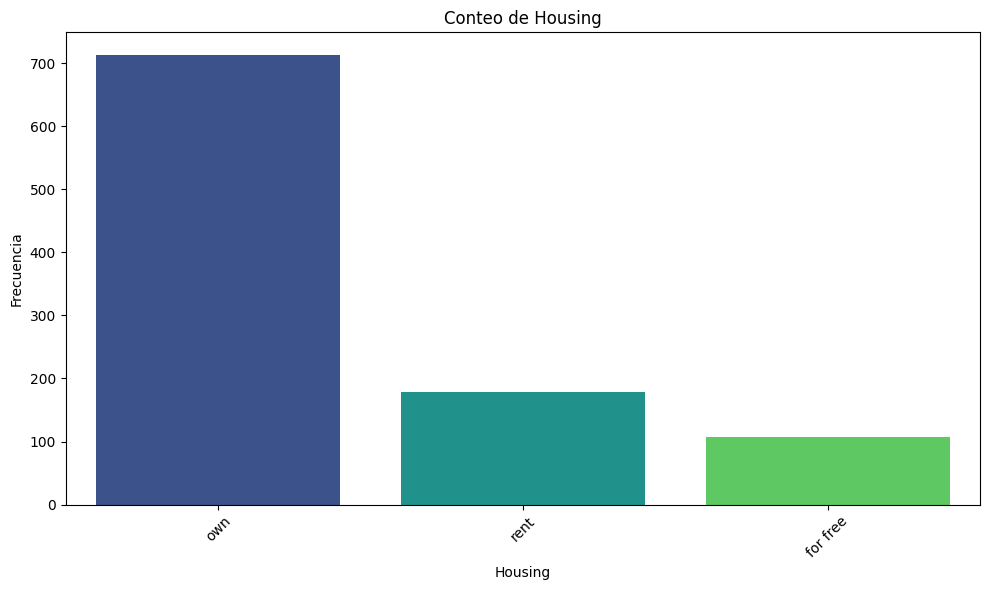

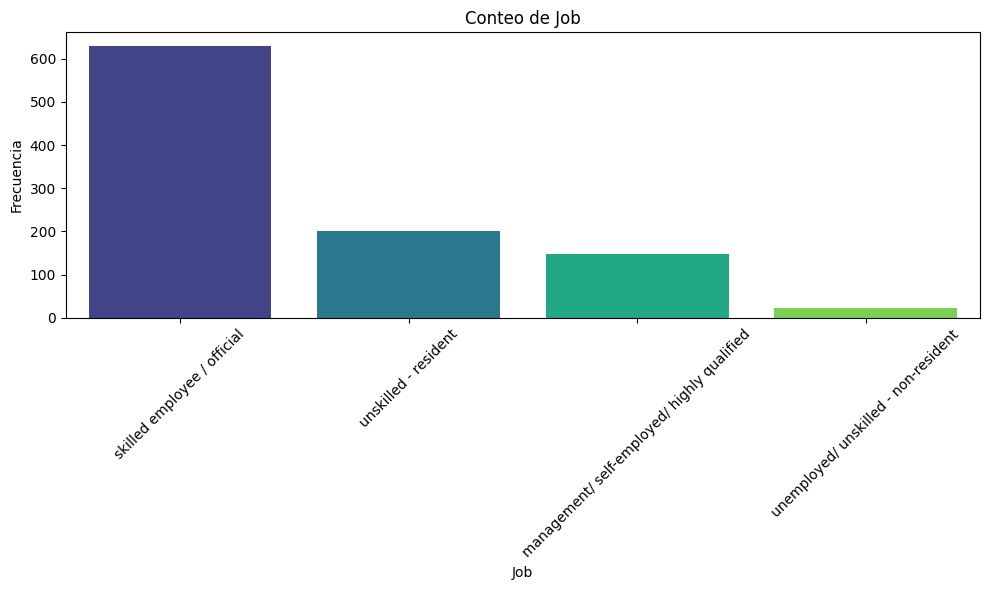

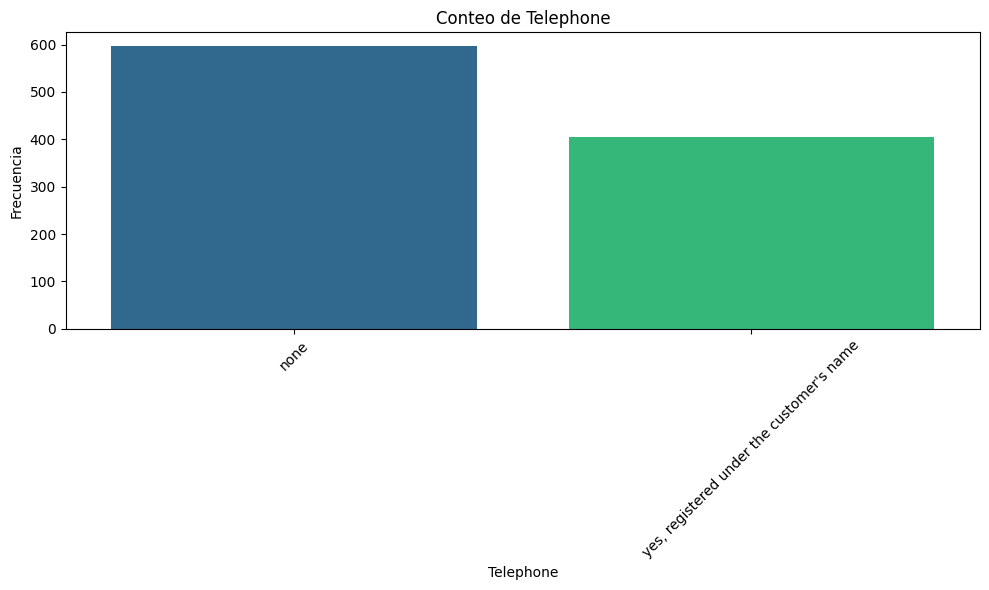

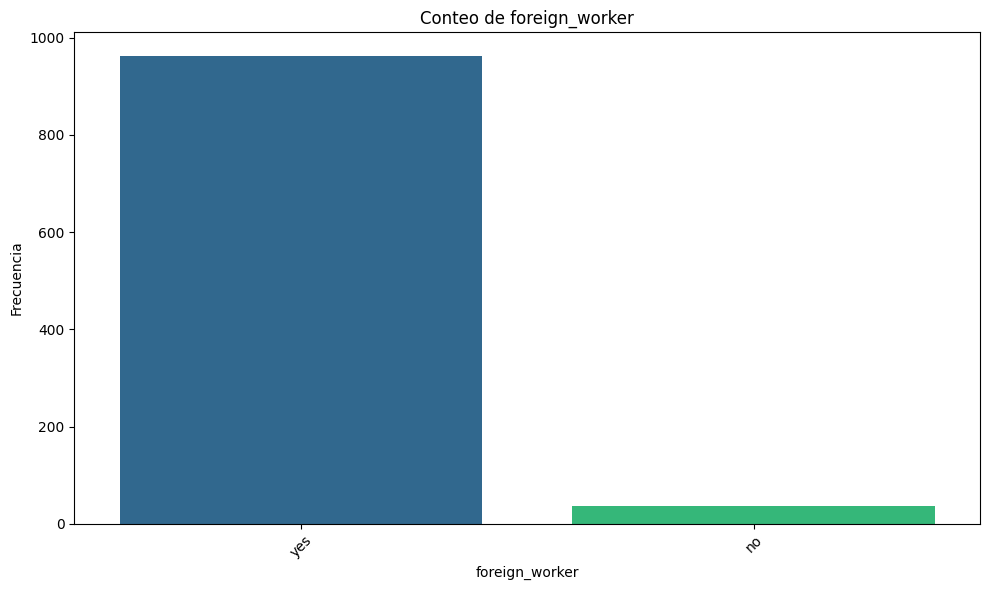

In [26]:
visualize_numerical(df, numerical_cols)
visualize_categorical(df, categorical_cols)


Al analizar la visualización de las variables numéricas, podemos confirmar que no se encuentran valores perdidos en el conjunto de datos, lo cual facilita el análisis y garantiza que todas las observaciones están completas. Asimismo, en los diagramas de caja no se observan valores atípicos o outliers significativos, lo cual sugiere que las características numéricas se distribuyen de manera consistente sin presencia de puntos extremos que puedan distorsionar el análisis.

Al examinar los histogramas de algunas variables, observamos que no siguen una distribución normal, lo cual es esperado dada la naturaleza de estas características. Por ejemplo, variables como el número de créditos existentes en el banco no presentan una curva simétrica, ya que se espera que esta variable esté concentrada en ciertos valores debido a las prácticas de crédito estándar. Esta falta de normalidad es común en datos financieros y no representa necesariamente un problema para el análisis.

En la visualización de las variables categóricas, observamos una distribución balanceada y desequilibrada en diferentes variables, que refleja la diversidad y características de los solicitantes de crédito. Mediante un tratamiento adecuado del desequilibrio en algunas categorías, podemos mejorar la capacidad del modelo para capturar patrones significativos y asegurar que aprenda de manera equilibrada y representativa de todo el conjunto de datos.

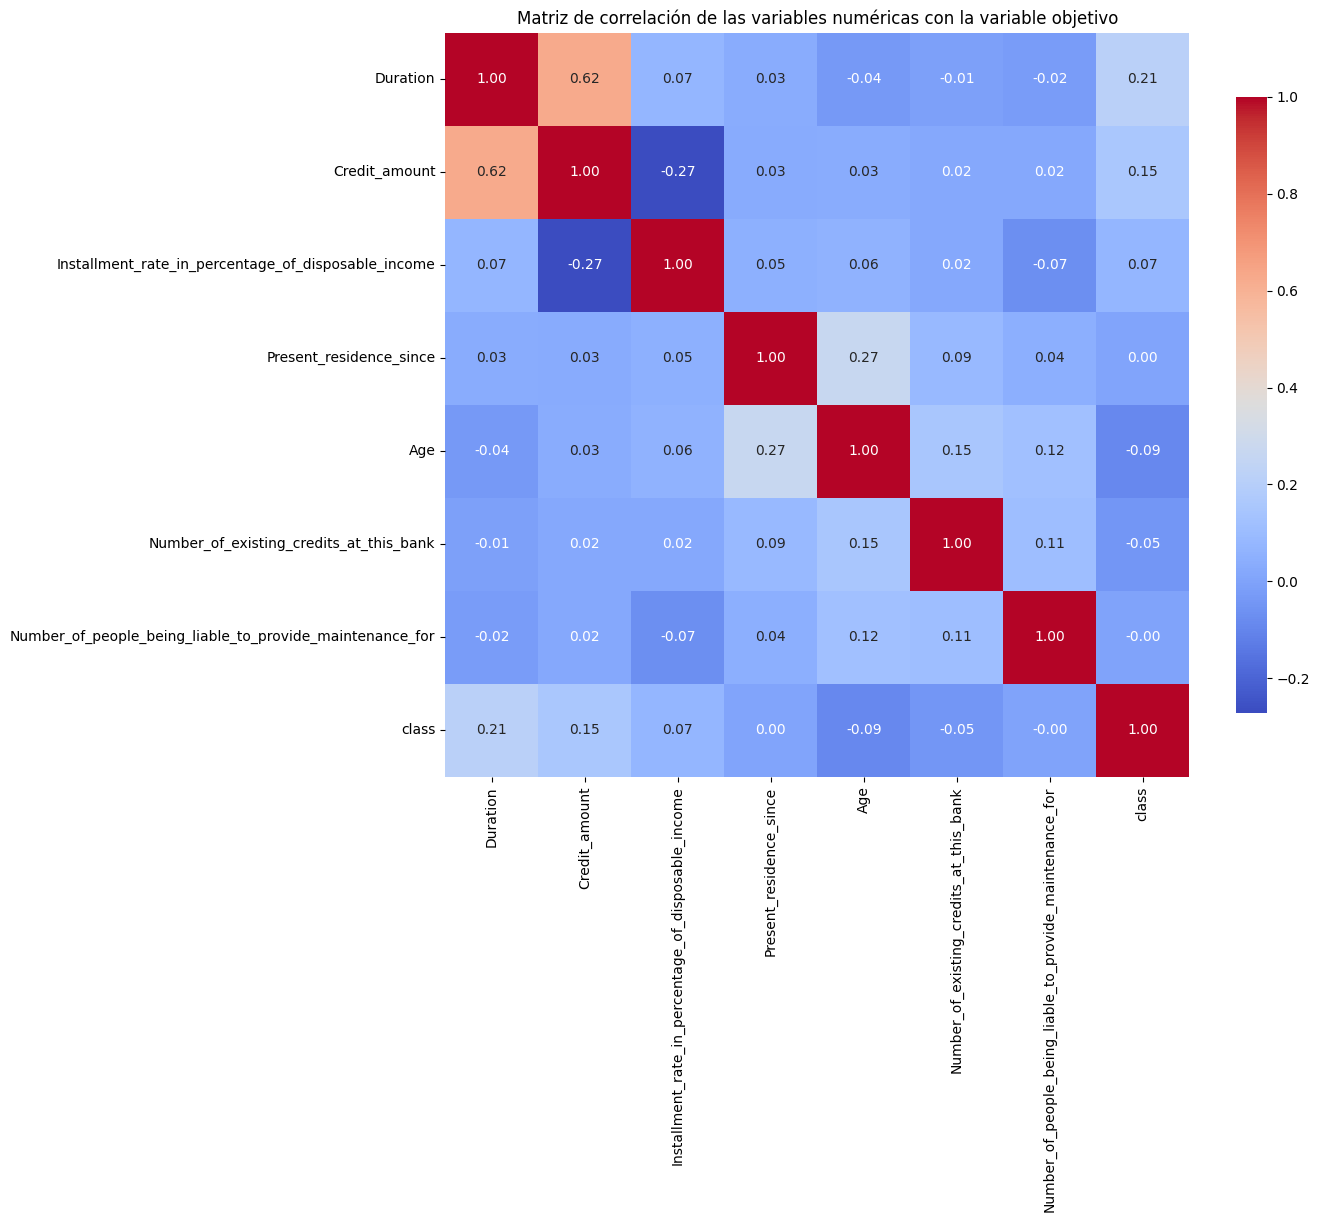

In [27]:

numerical_cols_with_target = numerical_cols + ['class']


corr_matrix_with_target = df[numerical_cols_with_target].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de correlación de las variables numéricas con la variable objetivo')
plt.show()


Al observar la matriz de correlación de las variables numéricas, notamos que la mayoría de los coeficientes de correlación se encuentran muy cerca de 0. Esto sugiere que, en general, las variables numéricas del conjunto de datos no presentan relaciones lineales fuertes entre sí. Este bajo grado de correlación implica que cada variable aporta información relativamente independiente, lo cual puede ser beneficioso para el modelo, ya que no se corre el riesgo de redundancia o multicolinealidad significativa entre las variables numéricas.

Sin embargo, hay una excepción: encontramos una correlación de aproximadamente 0.62 entre las variables Duration y Credit Amount. Una correlación positiva en este caso tendría sentido: a medida que aumenta la cantidad solicitada, es probable que también se extienda la duración del préstamo para permitir pagos más asequibles.

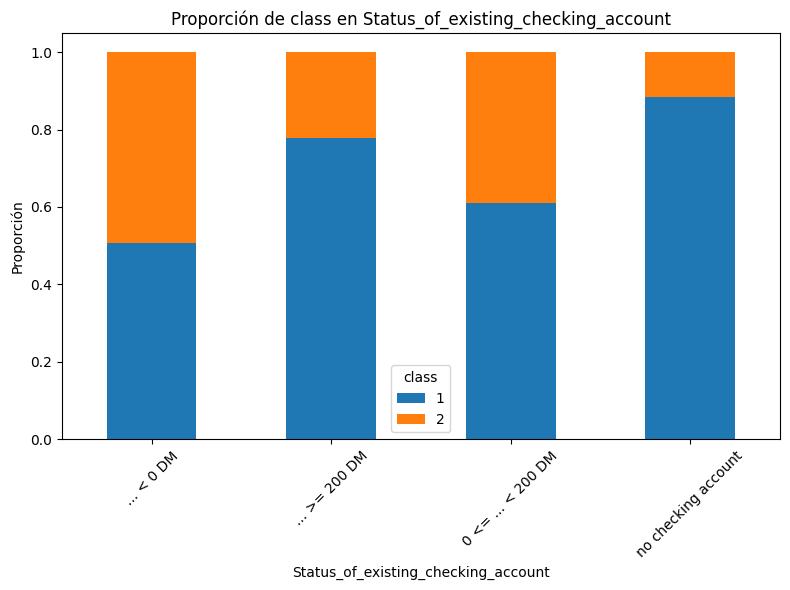

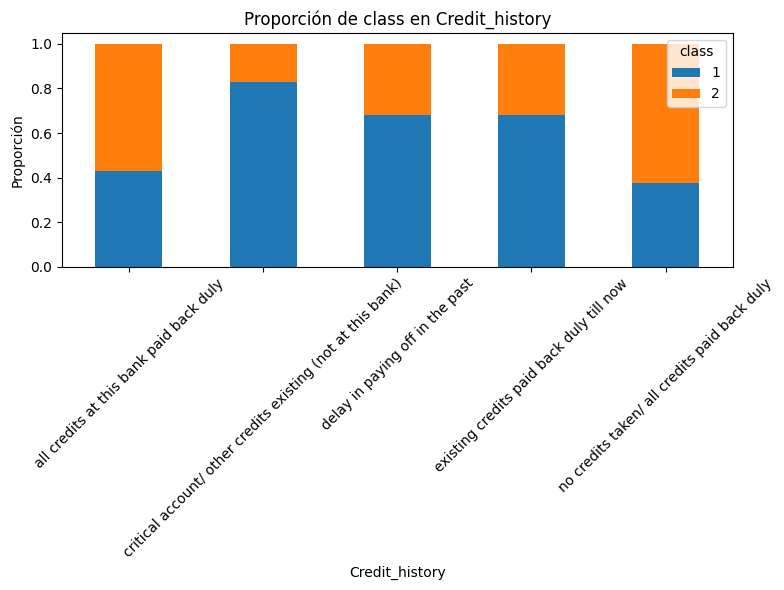

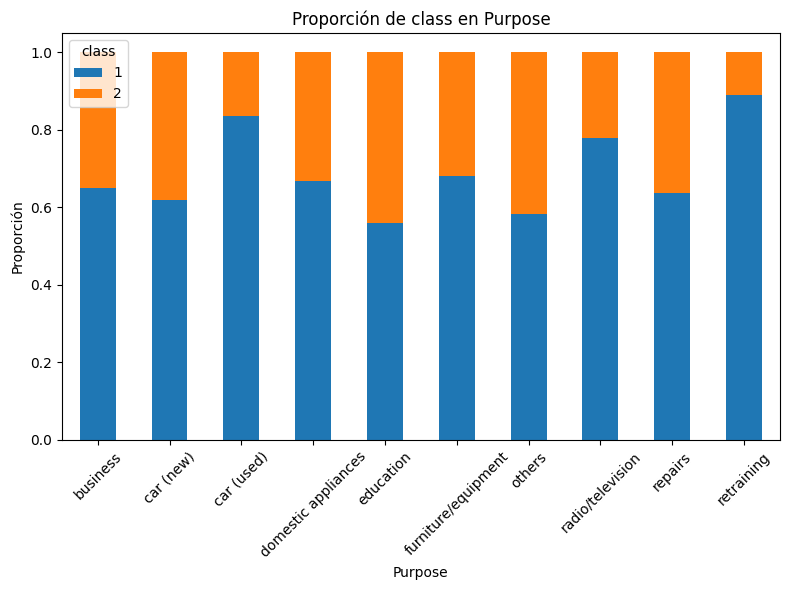

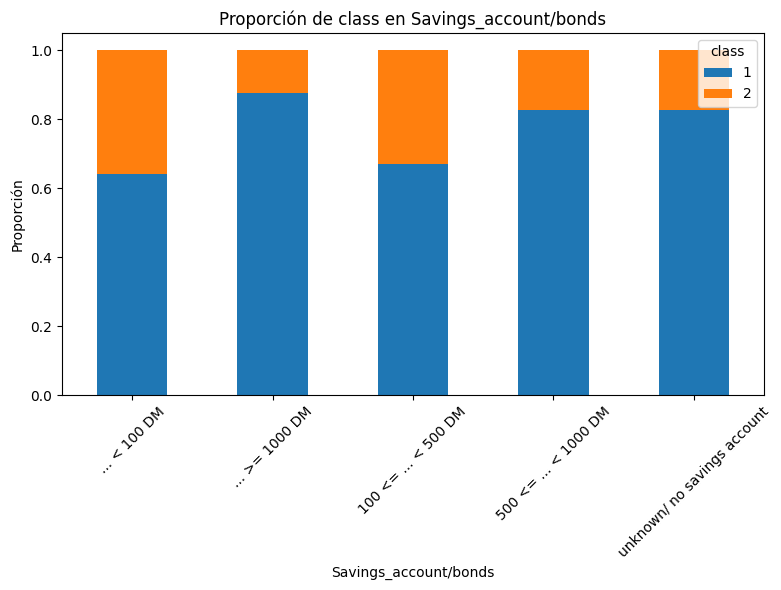

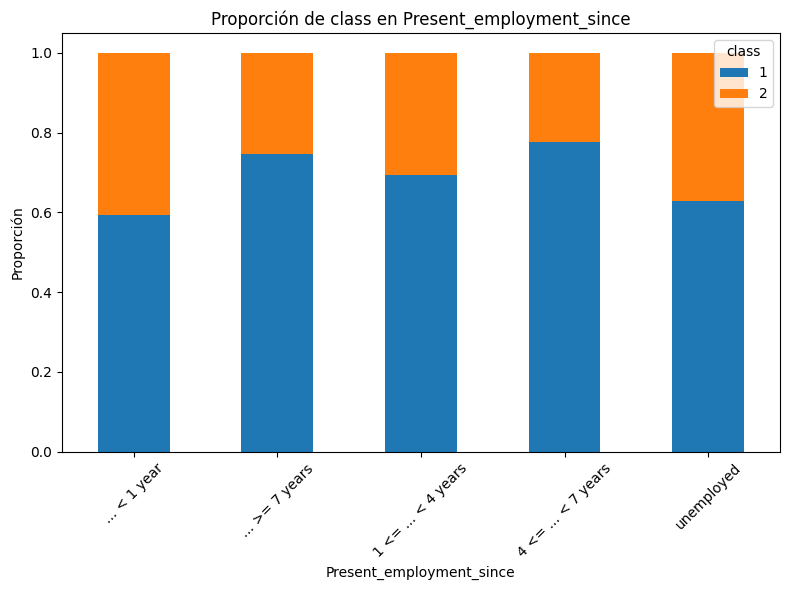

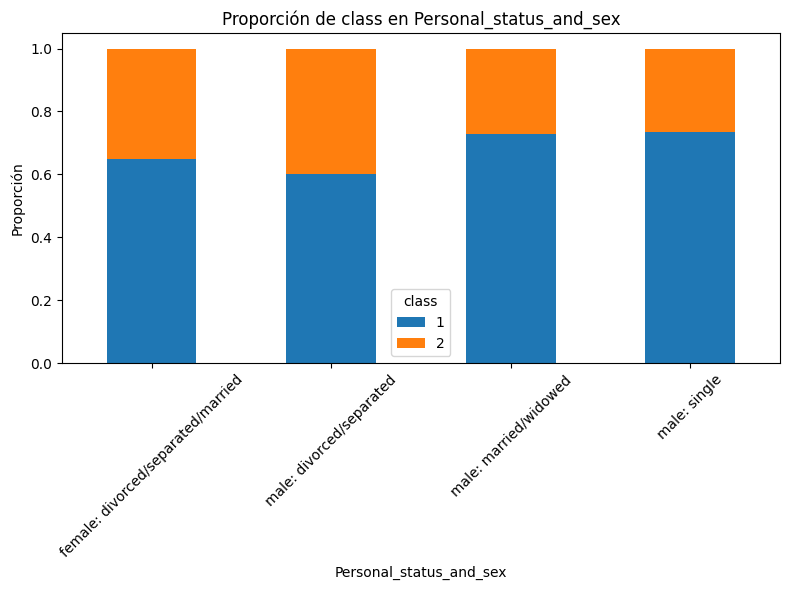

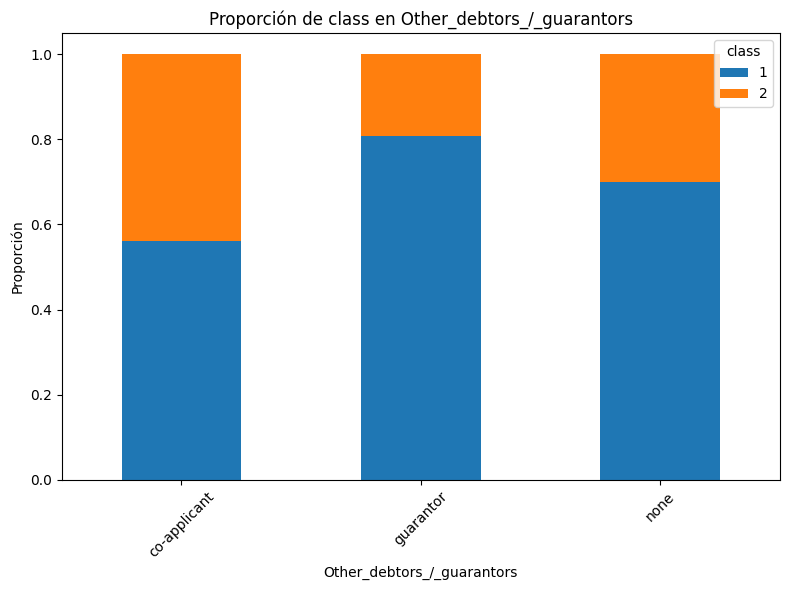

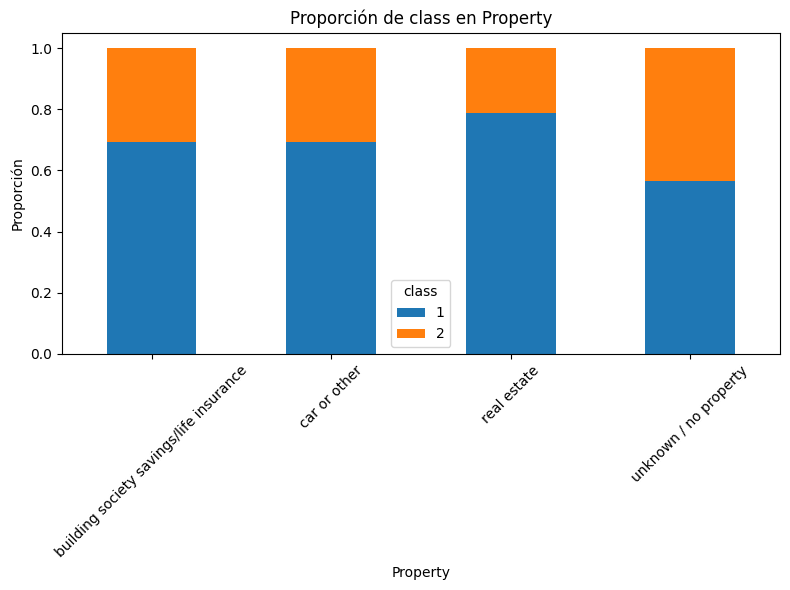

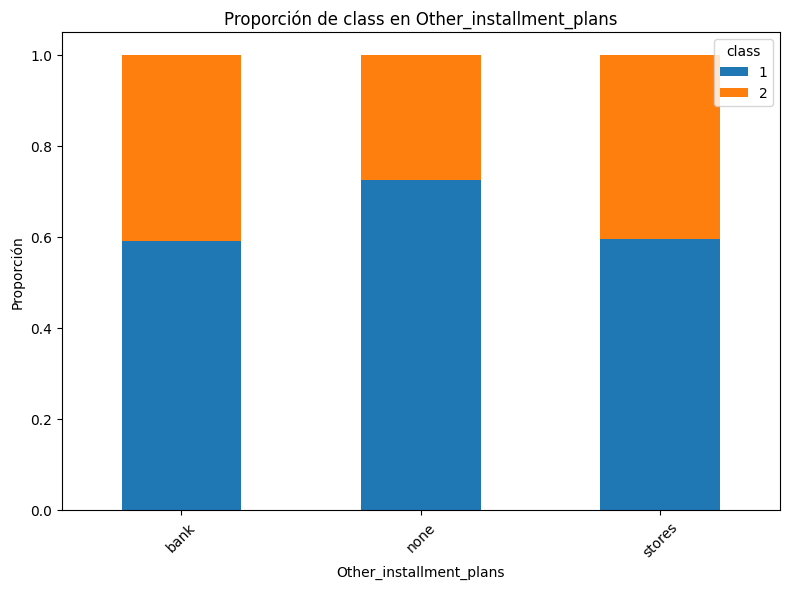

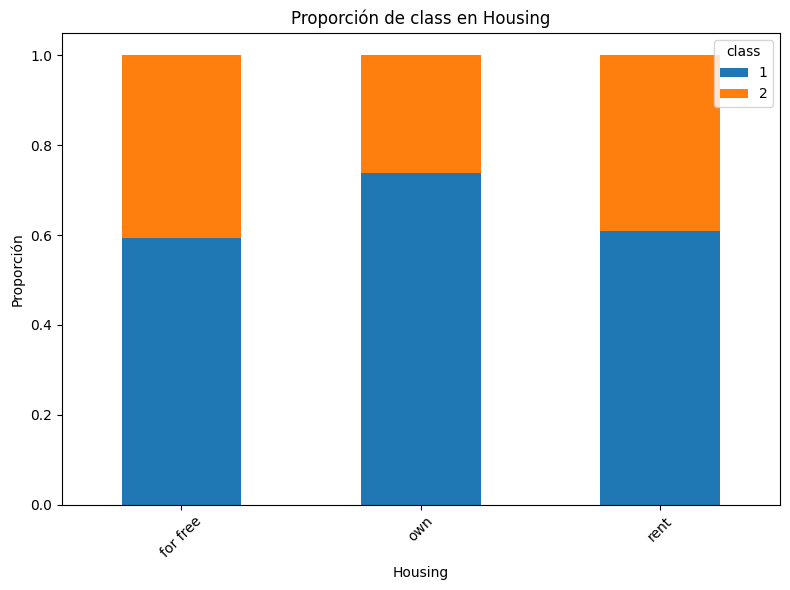

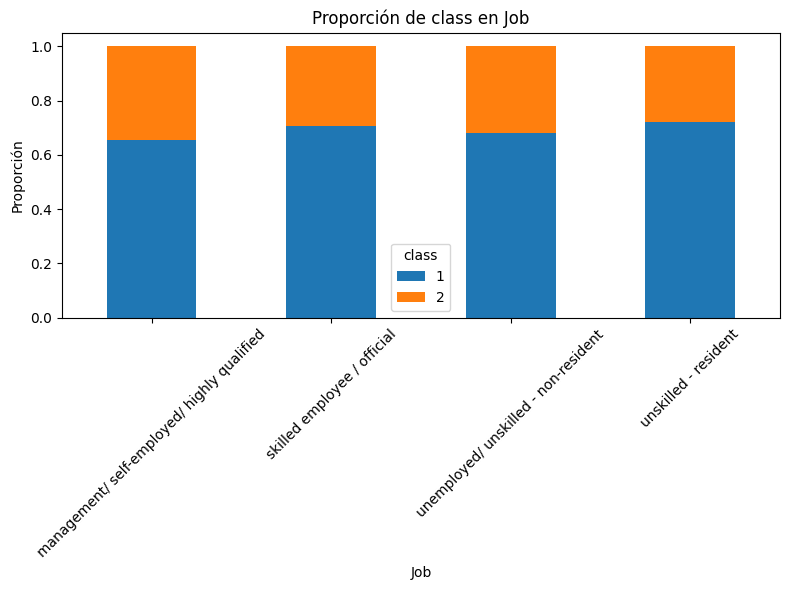

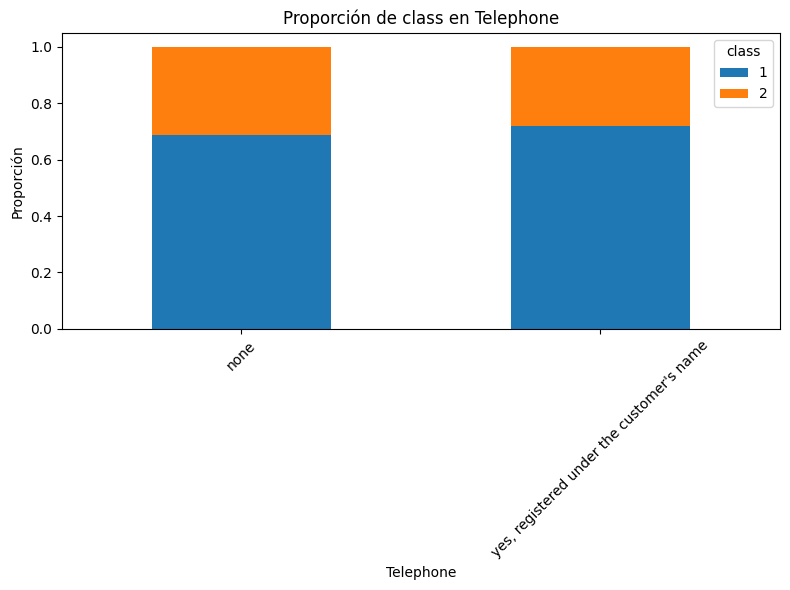

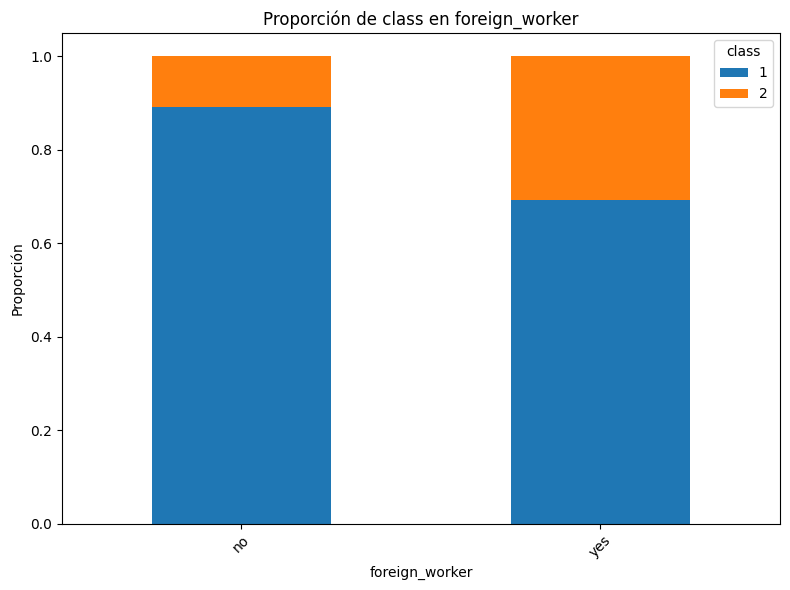

In [28]:
figsize = (8,6)

def visualize_categorical_vs_target(df, categorical_cols, target_col):
    """
    Visualiza variables categóricas en relación con la variable objetivo utilizando gráficos de barras agrupadas.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - categorical_cols: Lista de nombres de columnas categóricas.
    - target_col: Nombre de la columna objetivo.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in categorical_cols:
        plt.figure(figsize=figsize)
        order = df[col].value_counts().index
        sns.countplot(x=col, data=df, hue=target_col, order=order)
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.legend(title=target_col)
        plt.tight_layout()
        plt.show()

def visualize_categorical_vs_target_stacked(df, categorical_cols, target_col):
    import matplotlib.pyplot as plt
    import pandas as pd

    for col in categorical_cols:
        ct = pd.crosstab(df[col], df[target_col], normalize='index')
        ct.plot(kind='bar', stacked=True, figsize=figsize)
        plt.title(f'Proporción de {target_col} en {col}')
        plt.xlabel(col)
        plt.ylabel('Proporción')
        plt.legend(title=target_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


def visualize_numeric_vs_target(df, numerical_cols, target_col):
    """
    Visualiza variables numéricas en relación con la variable objetivo utilizando diagramas de caja.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - numerical_cols: Lista de nombres de columnas numéricas.
    - target_col: Nombre de la columna objetivo.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in numerical_cols:
        plt.figure(figsize=figsize)
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(target_col)
        plt.ylabel(col)
        plt.show()

def visualize_numeric_vs_target_violin(df, numerical_cols, target_col):
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in numerical_cols:
        plt.figure(figsize=figsize)
        sns.violinplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(target_col)
        plt.ylabel(col)
        plt.show()

def visualize_numeric_vs_target_hist(df, numerical_cols, target_col):
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in numerical_cols:
        plt.figure(figsize=figsize)
        sns.histplot(data=df, x=col, hue=target_col, kde=True, element='step', stat='density', common_norm=False)
        plt.title(f'Distribución de {col} por {target_col}')
        plt.xlabel(col)
        plt.ylabel('Densidad')
        plt.show()



#class: 1 = good , 2 = bad
# Visualizar variables numéricas vs. variable objetivo
#visualize_numeric_vs_target_violin(df, numerical_cols, 'class')
#visualize_numeric_vs_target_hist(df, numerical_cols, 'class')
#visualize_numeric_vs_target(df, numerical_cols, 'class')

# Visualizar variables categóricas vs. variable objetivo
#visualize_categorical_vs_target(df, categorical_cols, 'class')
visualize_categorical_vs_target_stacked(df, categorical_cols, 'class')


Estos gráficos de barras apiladas nos permiten analizar la proporción de la variable objetivo (class) dentro de cada categoría de las variables categóricas. Este tipo de gráfico apilado muestra, para cada categoría, la distribución proporcional de las clases (en este caso, "Good" y "Bad"), permitiendo observar si alguna categoría está más asociada a una de las clases.

En este caso concreto, no parece que ninguna categoría muestre una tendencia claramente dominante hacia una u otra clase de riesgo. Esto sugiere que, al menos a primera vista, ninguna de las categorías se destaca significativamente como indicador del riesgo de un préstamo.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='class'), df['class'], test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.90      0.85       209
           2       0.68      0.46      0.55        91

    accuracy                           0.77       300
   macro avg       0.74      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300



Con estos resultados tenemos un 77% de precisión, que es razonable para un modelo simple como la regresión logística, pero no extremadamente alto. Esto sugiere que el modelo tiene cierto éxito, aunque no perfecto, para separar las clases.
Respecto a la precision y el recall observamos que la clase 1 tiene una precisión y recall más altos (0.79 y 0.90), mientras que la clase 2 tiene métricas mucho menores, en particular, un recall de 0.46. Esto significa que el modelo tiene dificultades para identificar correctamente la clase 2 y la predice menos eficazmente que la clase 1.
Además, el F1-score más bajo de la clase 2 (0.55) también indica que el modelo tiene problemas para capturar adecuadamente los ejemplos de esta clase.
En conclusión, dado que el modelo muestra dificultades para clasificar correctamente una de las dos clases, podríamos concluir que el conjunto de datos presenta cierta complejidad, especialmente en la diferenciación de la clase minoritaria (clase 2).

## Preprocesamiento

En este apartado aplicaremos el preprocesamiento a los datos.  
### Missing Values
Miramos si existen missing values:

In [30]:
df.isnull().sum()

Status_of_existing_checking_account                         0
Duration                                                    0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_account/bonds                                       0
Present_employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors_/_guarantors                                  0
Present_residence_since                                     0
Property                                                    0
Age                                                         0
Other_installment_plans                                     0
Housing                                                     0
Number_of_existing_credits_at_this_bank                     0
Job     

No existen valores perdidos.   

### Outliers y valores incoherentes o incorrectos

Miremos si hay valores extremos que debamos tener en cuenta. Segun lo que hemos podido ver de los gráficos en la visualizacion inicial de los datos,
no hay valores perdidos codificados como valores extremos (podría ser que en vez de null los valores perdidos tuvieran un valor extremo para indicarse) y tampoco  
observamos que debieramos eliminar ninguna instancia ya que todas tienen sus variables con valores dentro de los rangos y distribuciones que supondriamos.

Aún así vamos a aplicar un algoritmo como **LocalOutlierFactor** de scikit para ver que instancias considera outliers.

In [31]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Preparar datos numéricos
df_numerico = df.select_dtypes(include=['int64'])

# Configurar y ajustar LOF
local_outlier_factor = LocalOutlierFactor(n_neighbors=20) # Número de vecinos a considerar
result = local_outlier_factor.fit_predict(df_numerico.values)

# Identificar outliers y puntos normales
outliers = result == -1
no_outliers = result == 1

# Ver número de outliers
print(f"Número de outliers detectados: {outliers.sum()}")

Número de outliers detectados: 4


Con 20 vecinos detecta 4 outliers veamos cuales son:

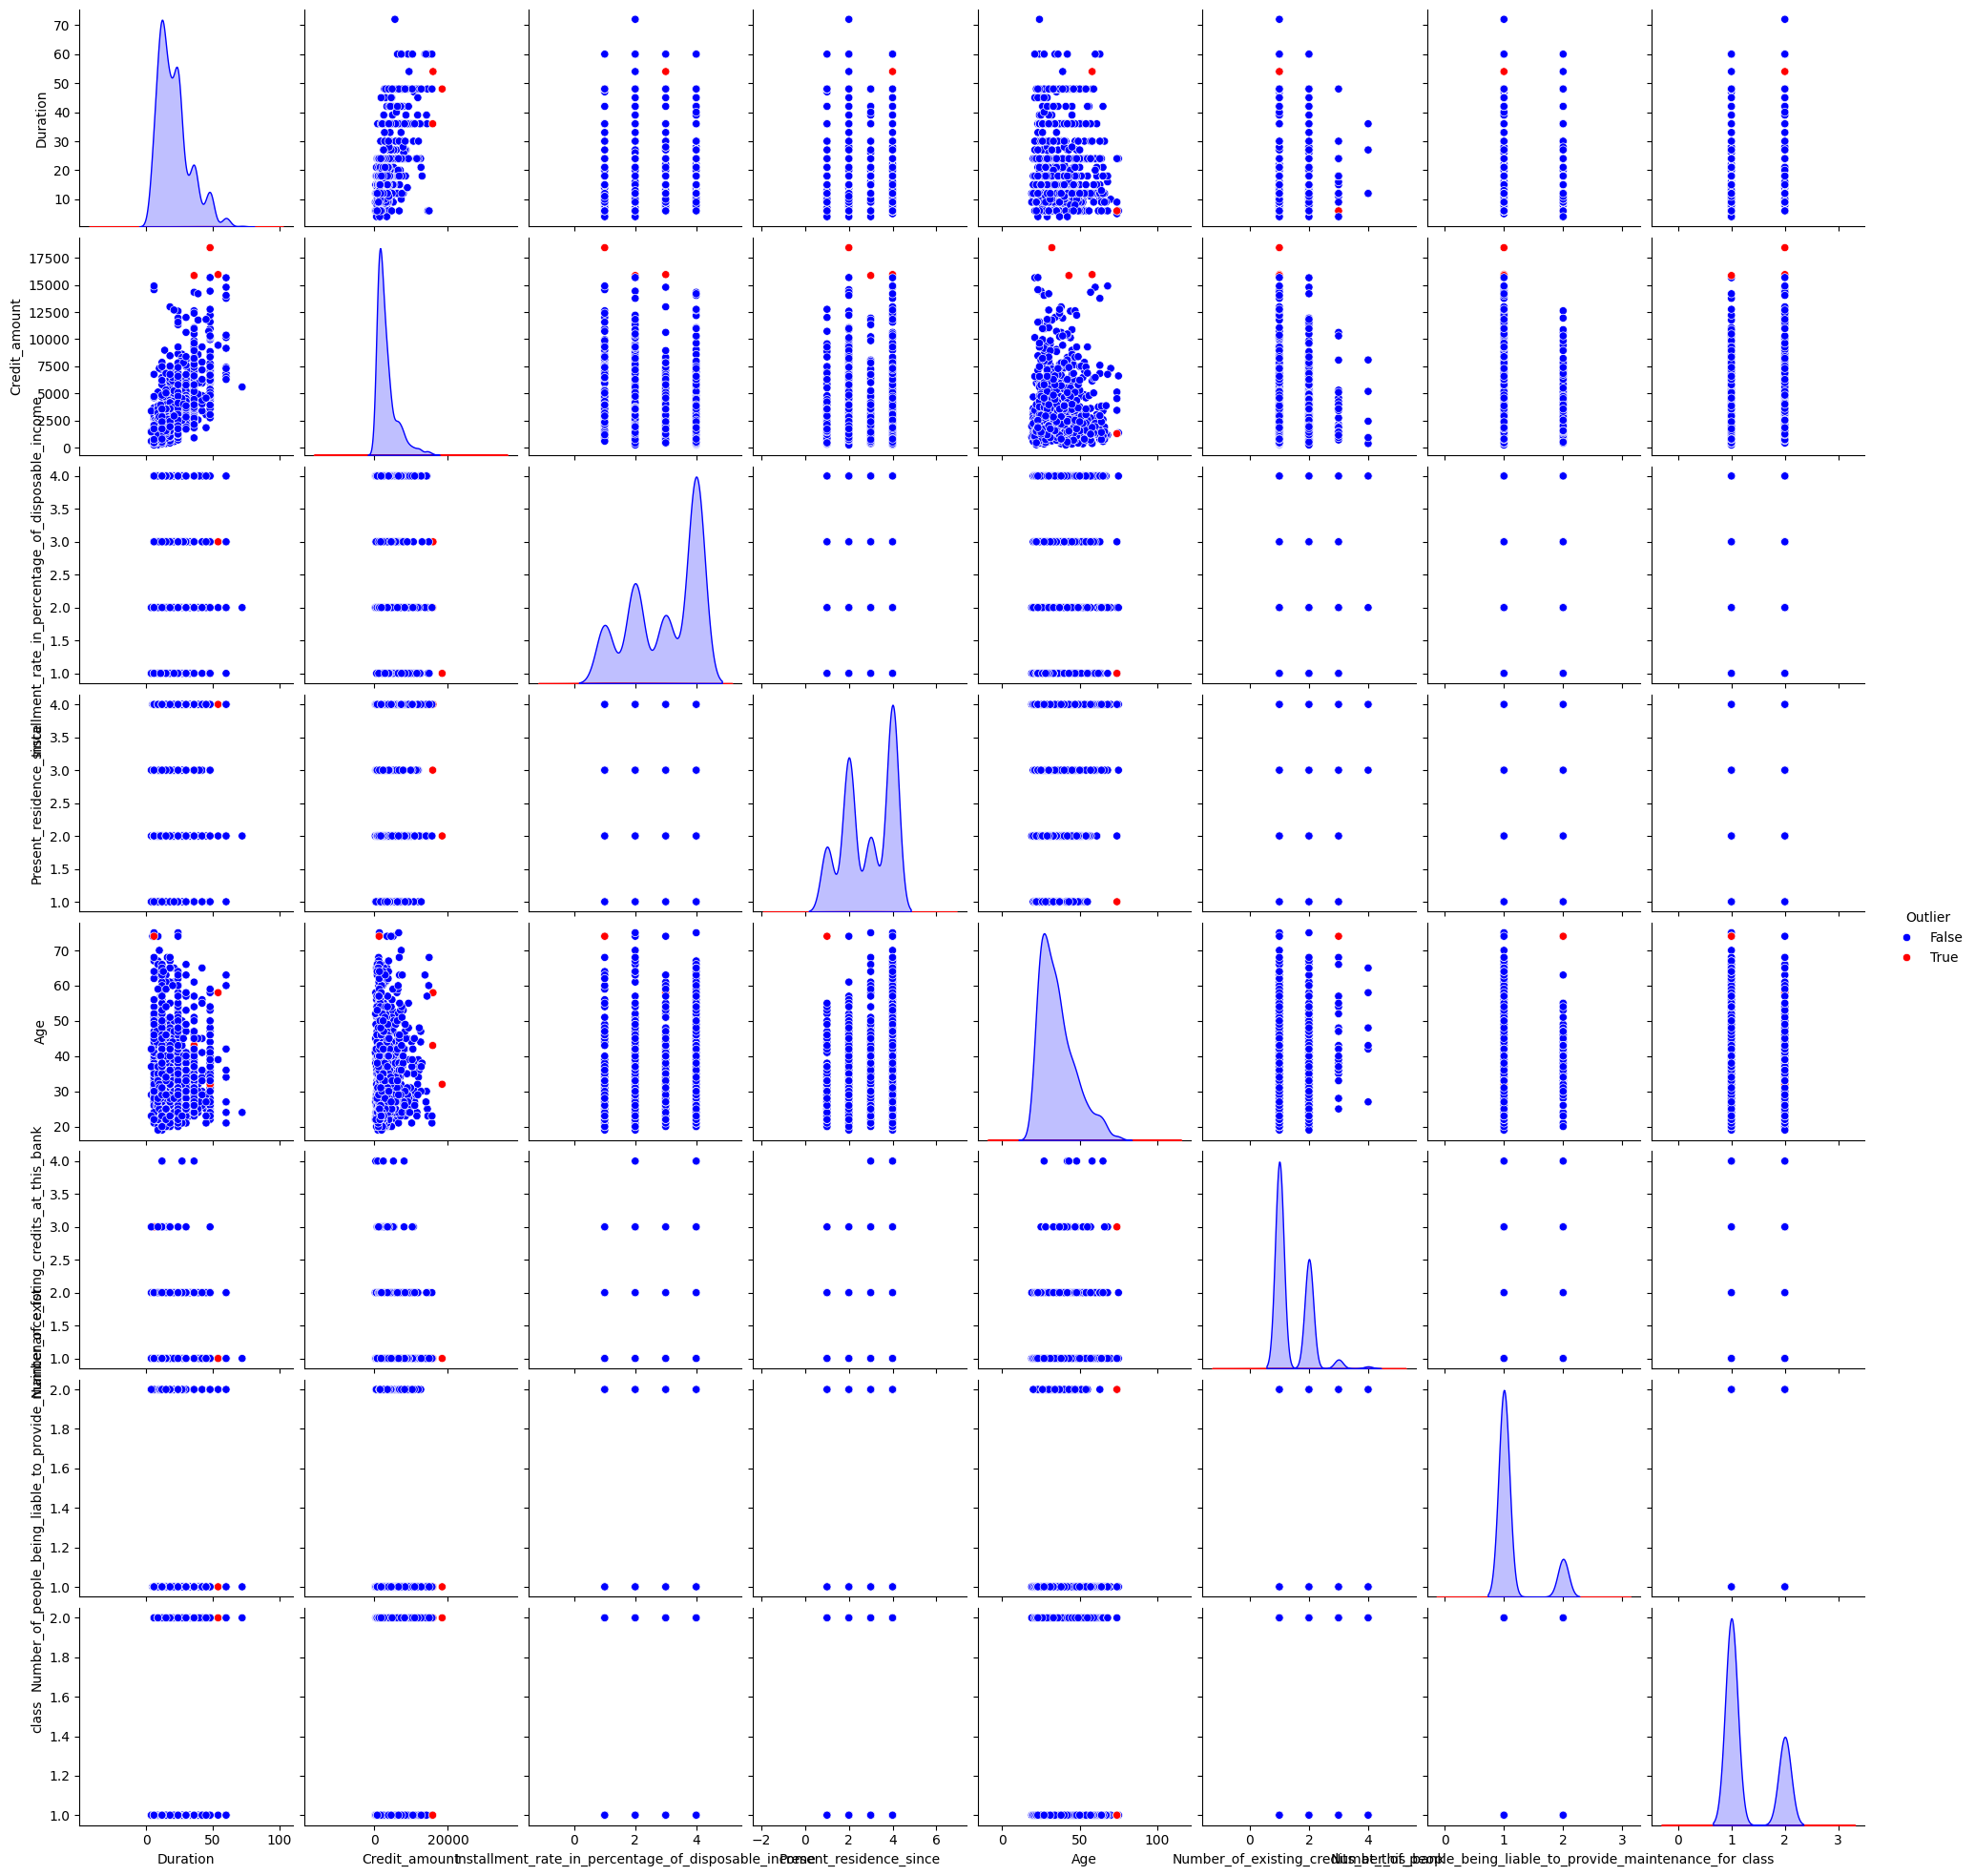

In [32]:
def plot_outliers(df_numerico, outliers):
    """
    Visualiza pares de variables numéricas, coloreando por outliers.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - outliers: Array booleano que indica si cada instancia es un outlier.
    - numerical_cols: Lista de nombres de columnas numéricas.
    """
    df_plot = df_numerico.copy()
    df_plot["Outlier"] = outliers

    sns.pairplot(df_plot, hue="Outlier", palette={0: "blue", 1: "red"}, diag_kind="kde")
    plt.show()

plot_outliers(df_numerico, outliers)

Podemos observar como 3 de los 4 outliers coinciden con los valores de credit_amount más alto probablemente sea porque la escala es mucho mayor a la resta de variables.  
Probemos a estandarizar las columnas antes de hacer todo este proceso:

Tipos de datos en el DataFrame:
Status_of_existing_checking_account                         object
Duration                                                     int64
Credit_history                                              object
Purpose                                                     object
Credit_amount                                                int64
Savings_account/bonds                                       object
Present_employment_since                                    object
Installment_rate_in_percentage_of_disposable_income          int64
Personal_status_and_sex                                     object
Other_debtors_/_guarantors                                  object
Present_residence_since                                      int64
Property                                                    object
Age                                                          int64
Other_installment_plans                                     object
Housing                       

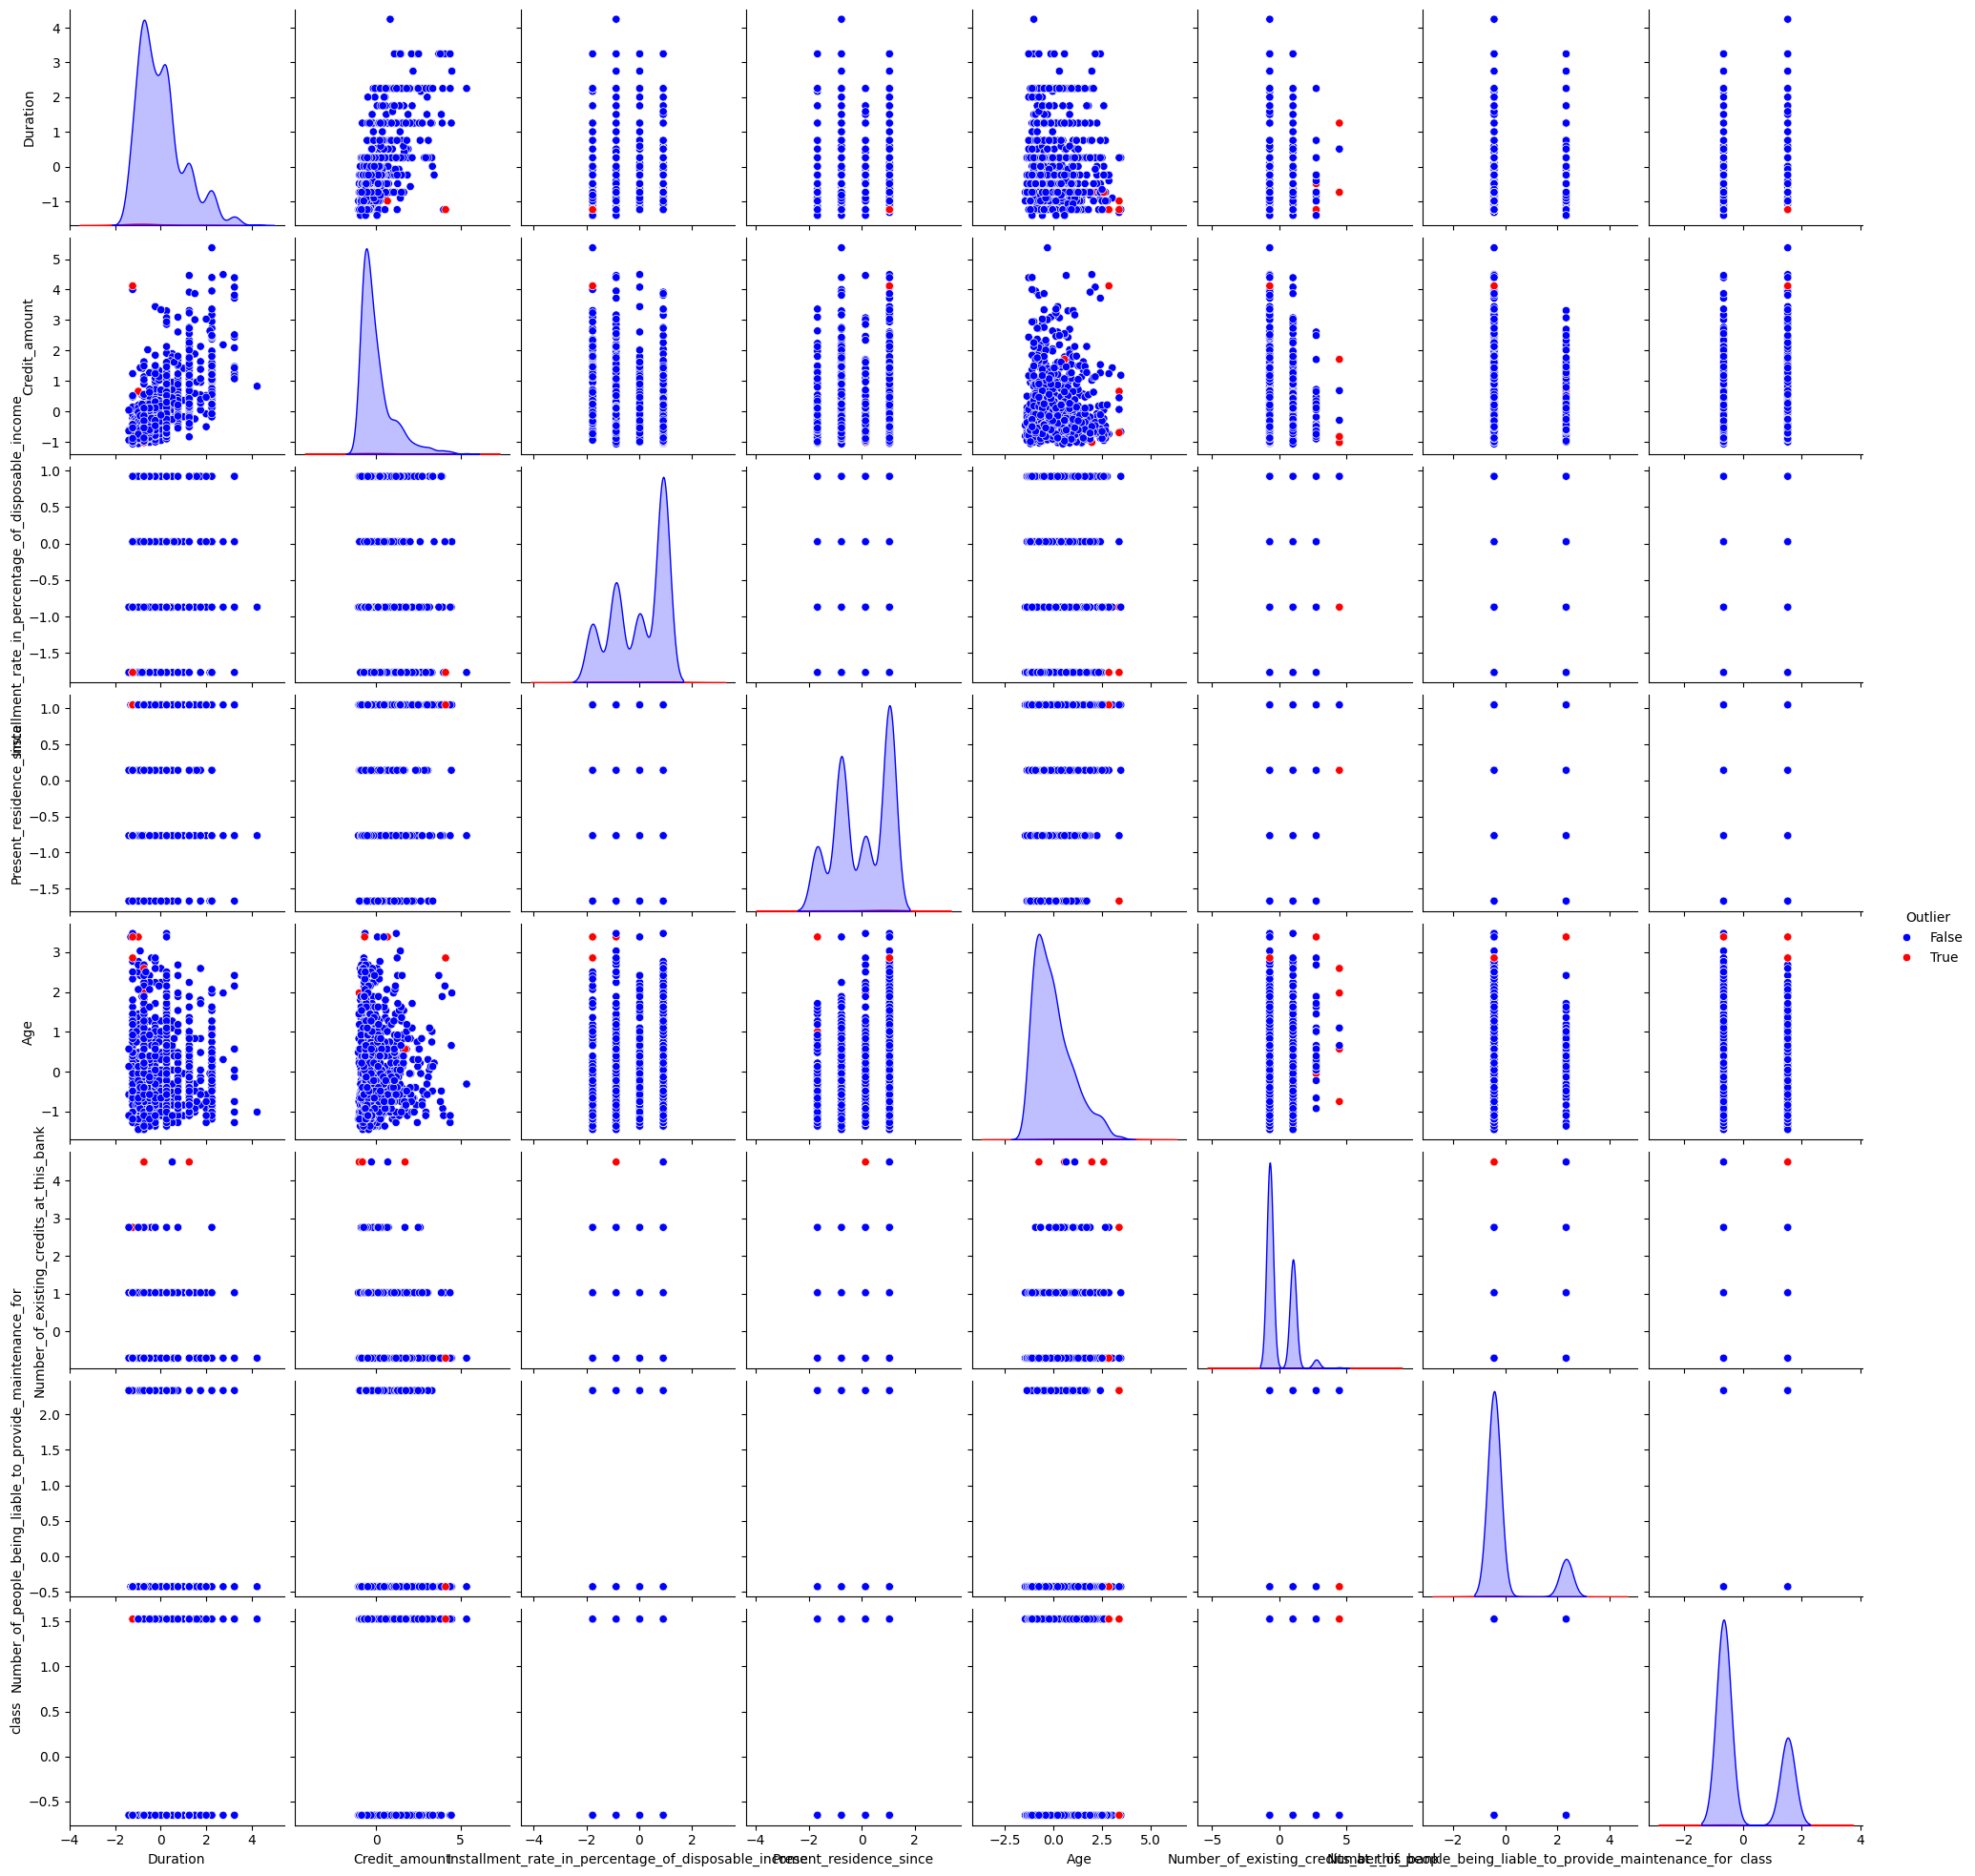

In [33]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que df es tu DataFrame original
# Imprimir los tipos de datos
print("Tipos de datos en el DataFrame:")
print(df.dtypes)

# Seleccionar columnas numéricas (solo int64 en este caso)
numerical_cols = df.select_dtypes(include=['int64'])

# Estandarizar los datos numéricos
scaler = StandardScaler()
scaled_values = scaler.fit_transform(numerical_cols)

# Convertir los datos escalados en un DataFrame para facilitar el manejo
scaled_df = pd.DataFrame(scaled_values, columns=numerical_cols.columns)

# Verificar los datos estandarizados
print("Primeras filas del DataFrame estandarizado:")
print(scaled_df.head())

# Configurar y ajustar LOF
local_outlier_factor = LocalOutlierFactor(n_neighbors=20)  # Número de vecinos
result = local_outlier_factor.fit_predict(scaled_df.values)

# Identificar outliers y puntos normales
outliers = result == -1
no_outliers = result == 1

# Ver número de outliers detectados
print(f"Número de outliers detectados: {outliers.sum()}")

# Llamar a la función de visualización
plot_outliers(scaled_df, outliers)

Observamos que ahora hay más outliers con el mismo numero de vecinos y estan distribuidos.  
Aún así podemos ver como estos valores tampoco se alejan exageradamente de la resta, como hemos dicho nosotros no consideraremos **de momento** que haya outliers.

### Codificación de variables no continuas o no ordenadas
En nuestro conjunto de datos hace falta cambiar los valores de las variables categóricas de strings a numeros:

In [34]:
# Mostrar antes de la conversión
display("Antes de la conversión de las variables categóricas:", df.head())

# Convertir las variables categóricas en valores numéricos
for column in df.columns:
    if df[column].dtype == 'object':  # Verificar si la columna es categórica
        df[column], _ = pd.factorize(df[column])


# Mostrar antes de la conversión
display("Después de la conversión de las variables categóricas:", df.head())

'Antes de la conversión de las variables categóricas:'

,Status_of_existing_checking_account,Duration,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_/_guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,class
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male: single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customer's name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female: divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male: single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male: single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male: single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


'Después de la conversión de las variables categóricas:'

,Status_of_existing_checking_account,Duration,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_/_guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,class
0,0,6,0,0,1169,0,0,4,0,0,...,0,67,0,0,2,0,1,0,0,1
1,1,48,1,0,5951,1,1,2,1,0,...,0,22,0,0,1,0,1,1,0,2
2,2,12,0,1,2096,1,2,2,0,0,...,0,49,0,0,1,1,2,1,0,1
3,0,42,1,2,7882,1,2,2,0,1,...,1,45,0,1,1,0,2,1,0,1
4,0,24,2,3,4870,1,1,3,0,0,...,2,53,0,1,2,0,2,1,0,2


### Posible eliminación de variables irrelevantes o redundantes (selección de características)

A continuación, observamos las correlaciones entre todas las variables, para identificar posibles candidatas a ser eliminadas.

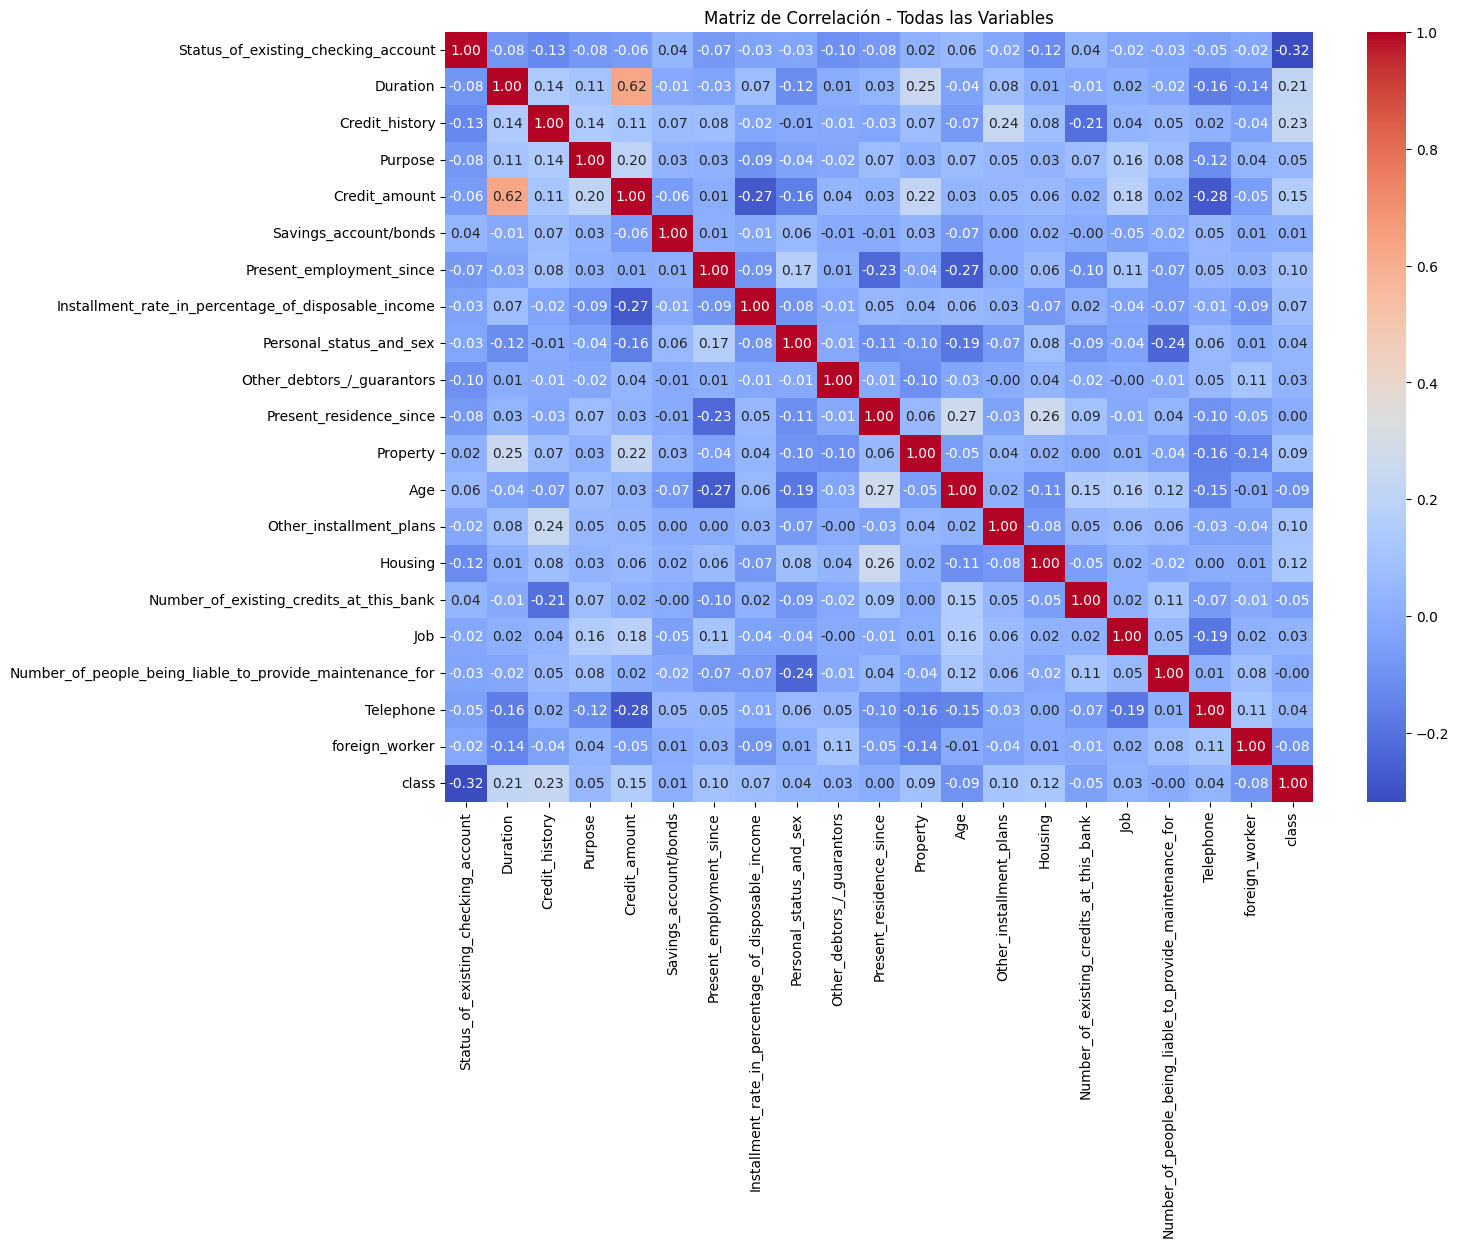

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar todas las columnas numéricas del DataFrame
all_numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Verificar si hay variables numéricas
if len(all_numeric_cols) == 0:
    print("No hay columnas numéricas válidas para generar un mapa de calor.")
else:
    # Calcular la matriz de correlación para todas las variables numéricas
    combined_corr_matrix = df[all_numeric_cols].corr()

    # Visualizar el mapa de calor
    plt.figure(figsize=(14, 10))
    sns.heatmap(
        combined_corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        cbar=True
    )
    plt.title('Matriz de Correlación - Todas las Variables')
    plt.show()


El análisis del mapa de calor muestra que las correlaciones entre las variables son moderadas, con valores entre 0.62 y -0.32, y no se observan relaciones extremadamente altas que indiquen redundancia. Aunque algunas variables tienen correlaciones muy bajas con la variable objetivo, esto por sí solo no es suficiente para justificar su eliminación, ya que podrían aportar información relevante en combinación con otras variables. Por lo tanto, de momento no eliminaremos ninguna variable y procederemos con el preprocesamiento completo antes de tomar decisiones adicionales.

### Creación de nuevas variables que puedan ser útiles (extracción de características)

En este caso, considerando las variables disponibles, no se considera necesario crear nuevas características en este momento. Las variables ya proporcionan información clara y bien definida, como duración del crédito, historial crediticio, cantidad del crédito, edad, y otras que capturan distintos aspectos relevantes del problema.

### Normalización de la variables (e.g. estandarización)

La normalización de las variables es un paso clave en el preprocesamiento, especialmente para modelos que son sensibles a las escalas de los datos. Este proceso garantiza que todas las variables numéricas tengan una escala comparable, evitando que aquellas con rangos más grandes dominen el análisis. En este caso, se realizará la estandarización, transformando las variables numéricas para que tengan una media de 0 y una desviación estándar de 1. Esto facilita la convergencia de los modelos y mejora la interpretabilidad de los resultados.

In [36]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas del DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inicializar el escalador
scaler = StandardScaler()

# Estandarizar las columnas numéricas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verificar la transformación
print("Primeras filas del DataFrame con las variables estandarizadas:")
print(df[numerical_cols].head())


Primeras filas del DataFrame con las variables estandarizadas:
   Status_of_existing_checking_account  Duration  Credit_history   Purpose  \
0                            -1.344000 -1.236478       -1.031578 -1.187477   
1                            -0.265348  2.248194       -0.022206 -1.187477   
2                             0.813303 -0.738668       -1.031578 -0.695565   
3                            -1.344000  1.750384       -0.022206 -0.203652   
4                            -1.344000  0.256953        0.987166  0.288261   

   Credit_amount  Savings_account/bonds  Present_employment_since  \
0      -0.745131              -1.134119                 -1.130009   
1       0.949817              -0.251536                 -0.406108   
2      -0.416562              -0.251536                  0.317792   
3       1.634247              -0.251536                  0.317792   
4       0.566664              -0.251536                 -0.406108   

   Installment_rate_in_percentage_of_disposable_incom

### Transformación de las variables (e.g. corrección de asimetrías graves y/o curtosis en los valores de los datos)

Para mejorar la calidad de nuestros datos, aplicaremos transformaciones a las variables numéricas con distribuciones altamente asimétricas o curtosis extrema. Estas transformaciones buscan acercar las distribuciones a una forma más normal, lo que es especialmente útil para algoritmos sensibles a estas características.

In [37]:
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Calcular asimetría y curtosis de las columnas numéricas
for col in numerical_cols:
    skewness = skew(df[col])
    curt = kurtosis(df[col])
    print(f"{col}: Asimetría = {skewness:.2f}, Curtosis = {curt:.2f}")

    # Aplicar transformación solo si la asimetría es significativa (e.g., |skewness| > 1)
    if abs(skewness) > 1:
        print(f"Aplicando transformación a {col}...")
        if (df[col] > 0).all():  # Asegurarse de que no haya valores <= 0 (para log)
            df[col] = np.log1p(df[col])  # Transformación logarítmica
        else:
            transformer = PowerTransformer(method='yeo-johnson', standardize=False)
            df[col] = transformer.fit_transform(df[col].values.reshape(-1, 1))

# Verificar nuevamente las distribuciones
for col in numerical_cols:
    skewness = skew(df[col])
    curt = kurtosis(df[col])
    print(f"{col} después de la transformación: Asimetría = {skewness:.2f}, Curtosis = {curt:.2f}")


Status_of_existing_checking_account: Asimetría = -0.03, Curtosis = -1.13
Duration: Asimetría = 1.09, Curtosis = 0.91
Aplicando transformación a Duration...
Credit_history: Asimetría = 1.41, Curtosis = 2.05
Aplicando transformación a Credit_history...
Purpose: Asimetría = 0.64, Curtosis = 0.22
Credit_amount: Asimetría = 1.95, Curtosis = 4.27
Aplicando transformación a Credit_amount...
Savings_account/bonds: Asimetría = 1.32, Curtosis = 0.96
Aplicando transformación a Savings_account/bonds...
Present_employment_since: Asimetría = 0.63, Curtosis = -0.83
Installment_rate_in_percentage_of_disposable_income: Asimetría = -0.53, Curtosis = -1.21
Personal_status_and_sex: Asimetría = 1.34, Curtosis = 0.87
Aplicando transformación a Personal_status_and_sex...
Other_debtors_/_guarantors: Asimetría = 3.38, Curtosis = 10.43
Aplicando transformación a Other_debtors_/_guarantors...
Present_residence_since: Asimetría = -0.27, Curtosis = -1.38
Property: Asimetría = -0.00, Curtosis = -1.57
Age: Asimetría

Tras aplicar las transformaciones a diversas variables, las distribuciones de las variables han mostrado una reducción significativa en asimetría y curtosis, logrando una mayor simetría en la mayoría de los casos.











## PCA

Para reducir la dimensionalidad de nuestros datos y facilitar su análisis, hemos aplicado un Análisis de Componentes Principales (PCA). Este método transforma las variables originales en un conjunto de componentes principales que explican la mayor cantidad de varianza posible en los datos. El objetivo es capturar al menos el 95% de la varianza total con el menor número de componentes principales, asegurando que la mayor parte de la información relevante se conserve mientras reducimos la complejidad del modelo.

Varianza explicada por cada componente principal:
[0.12178026 0.1181971  0.08635685 0.07938646 0.06531198 0.0590581
 0.05807727 0.05583239 0.04936928 0.04605397 0.04518353 0.04245684
 0.03605586 0.03351593 0.02980168 0.02676158]
El número de componentes seleccionados para explicar el 95% de la varianza es: 16


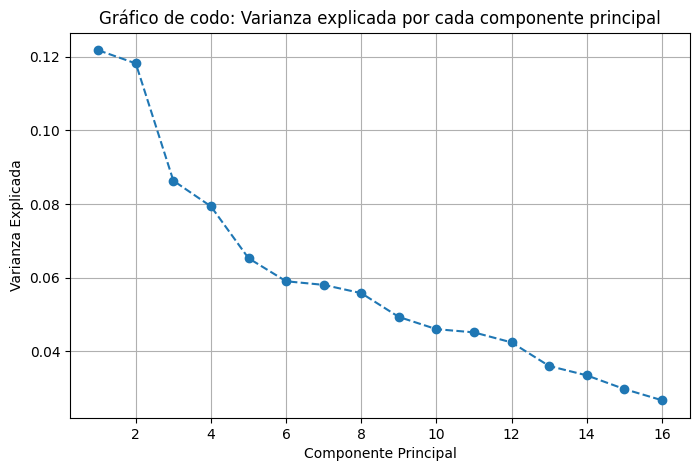

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Inicializar el PCA para capturar el 95% de la varianza
pca = PCA(n_components=0.95)

# Aplicar PCA a las variables numéricas ya estandarizadas
pca_transformed = pca.fit_transform(df[numerical_cols])

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

# Imprimir el porcentaje de varianza explicada por cada componente
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Imprimir el número de componentes seleccionados
print(f"El número de componentes seleccionados para explicar el 95% de la varianza es: {pca.n_components_}")

# Visualización: Gráfico de codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Gráfico de codo: Varianza explicada por cada componente principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.grid()
plt.show()

Tras aplicar el PCA, hemos identificado 16 componentes principales que explican el 95% de la varianza en los datos. Cada componente principal representa una combinación lineal de las variables originales, ordenadas por su capacidad de explicar la variabilidad en los datos. Los valores de varianza explicada por componente muestran que las primeras componentes contribuyen más significativamente, mientras que las últimas tienen menor impacto, lo que tiene sentido.

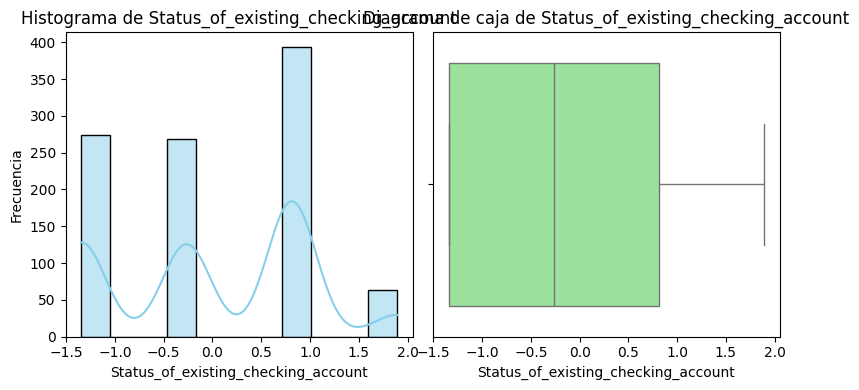

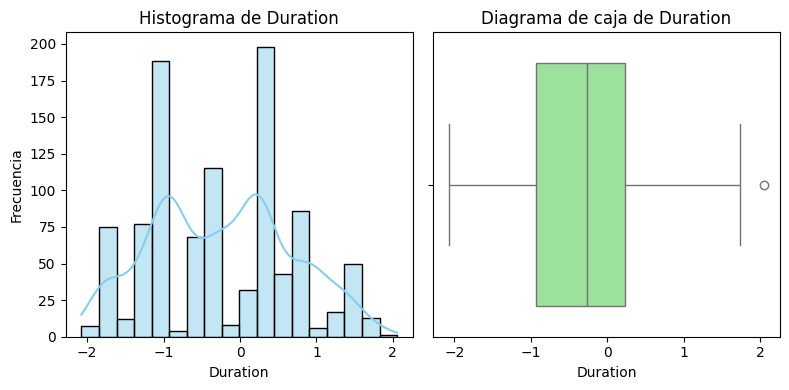

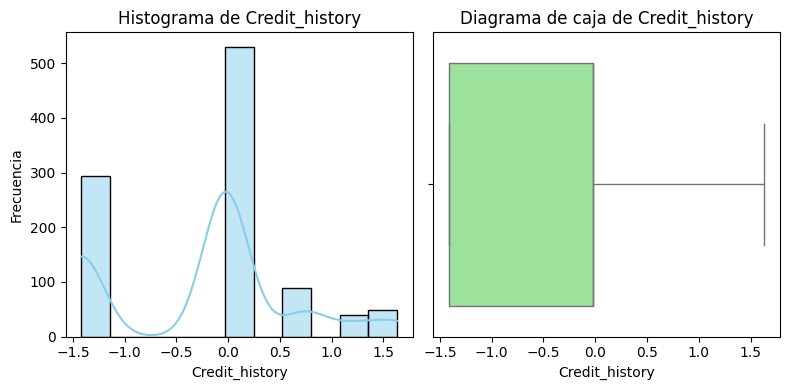

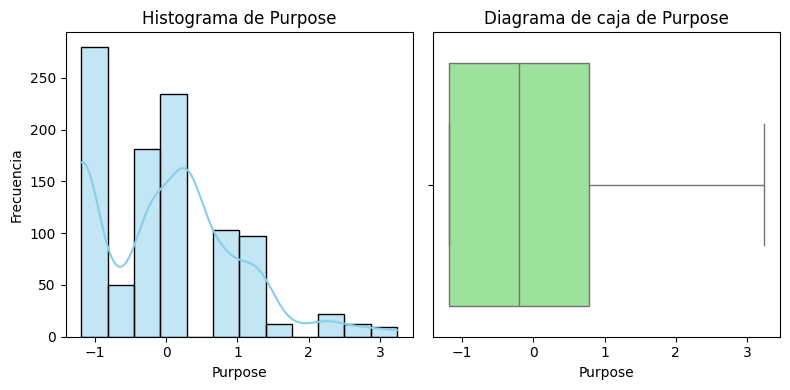

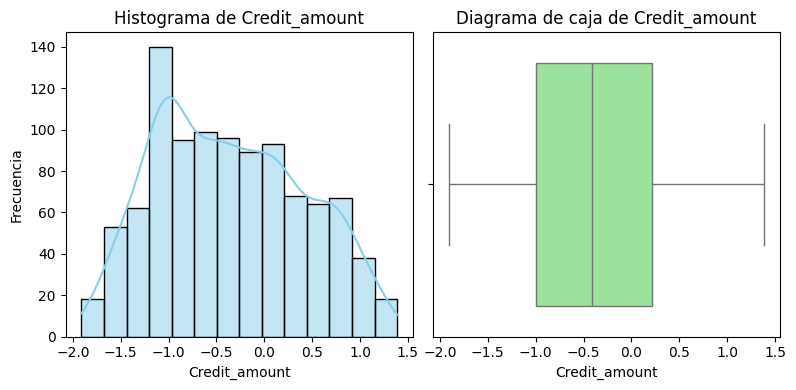

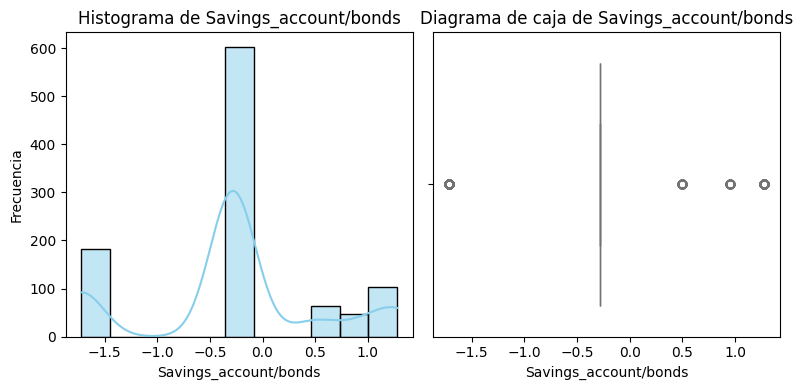

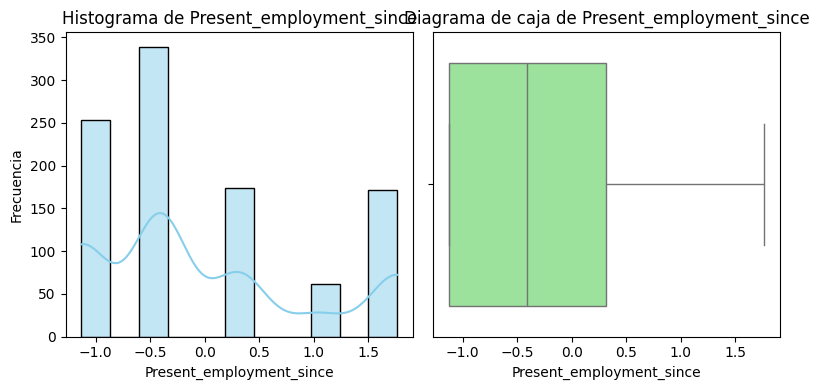

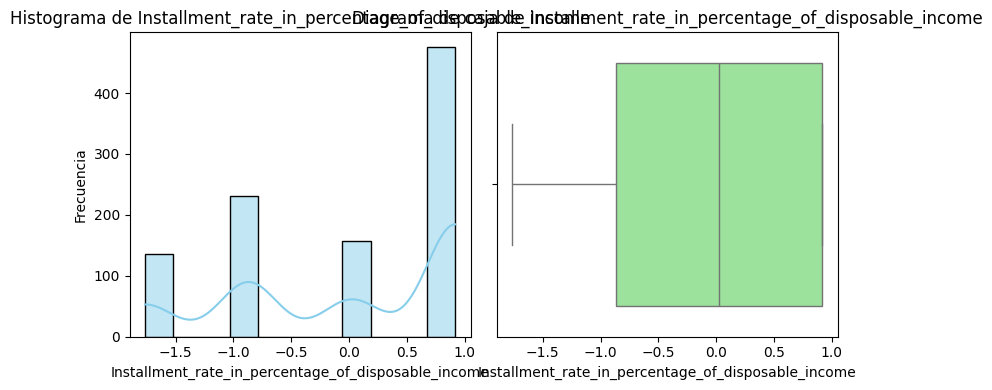

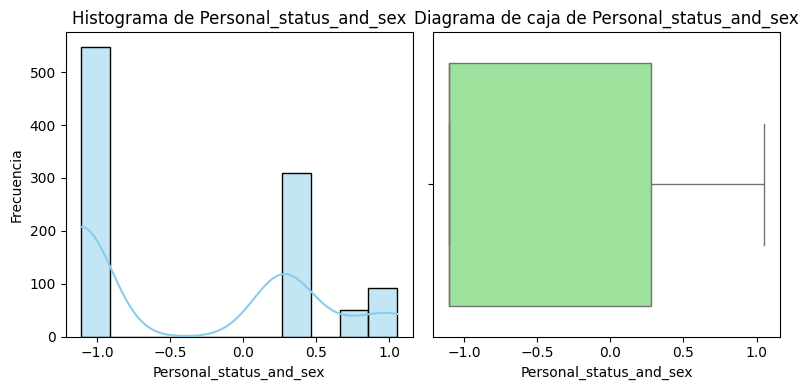

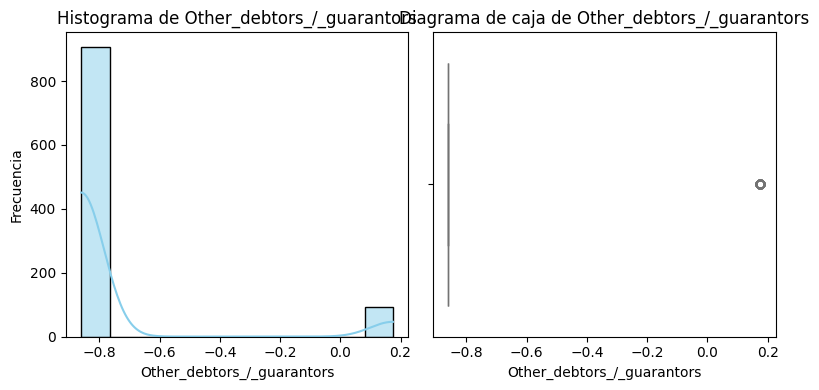

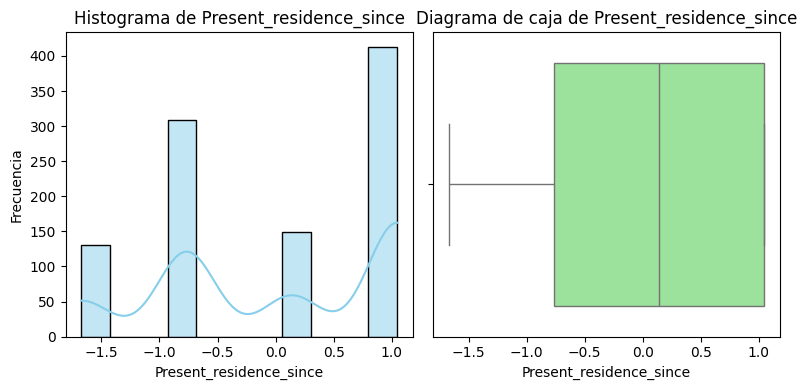

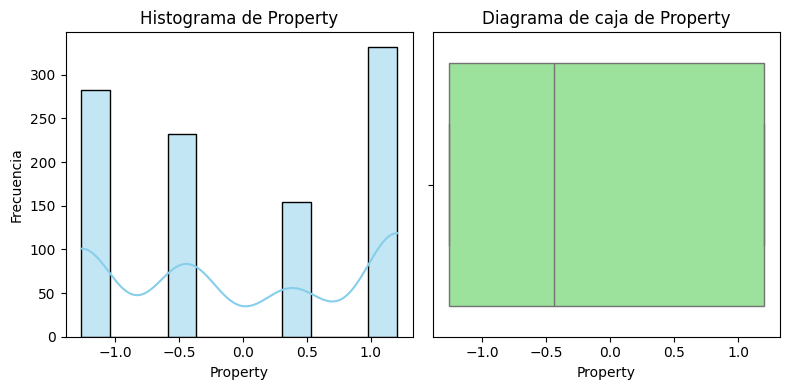

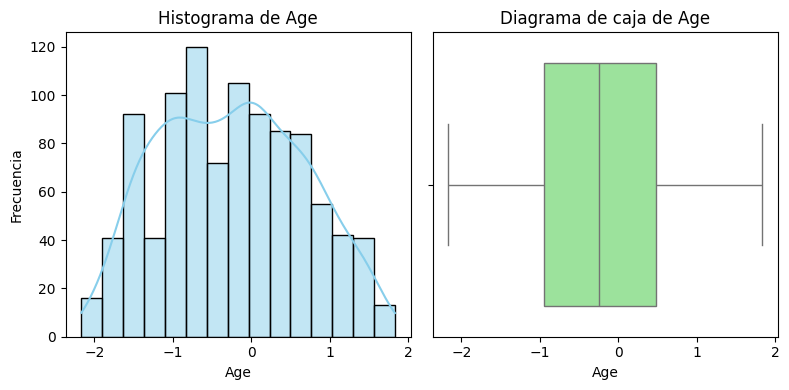

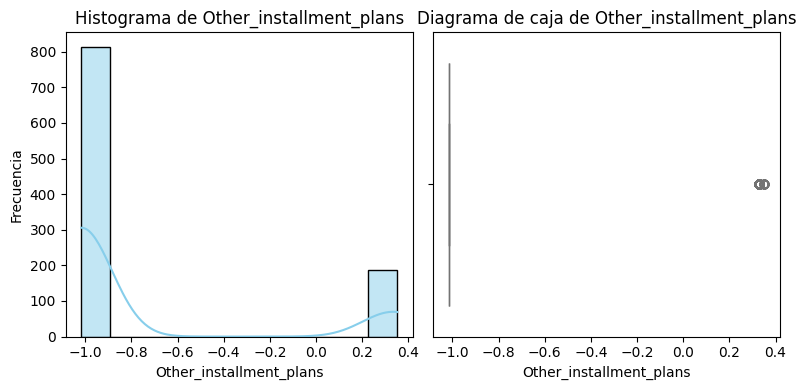

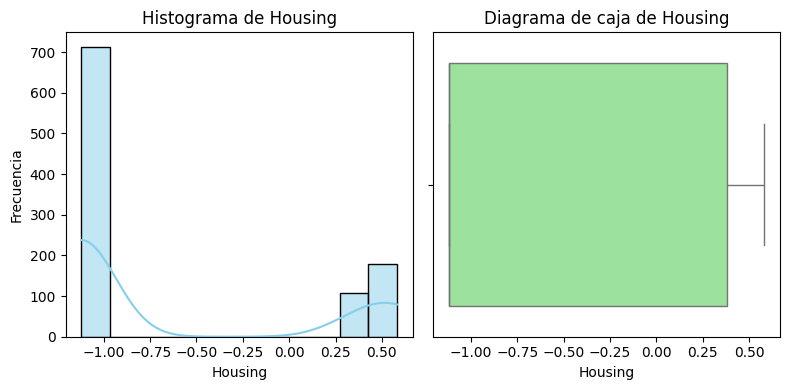

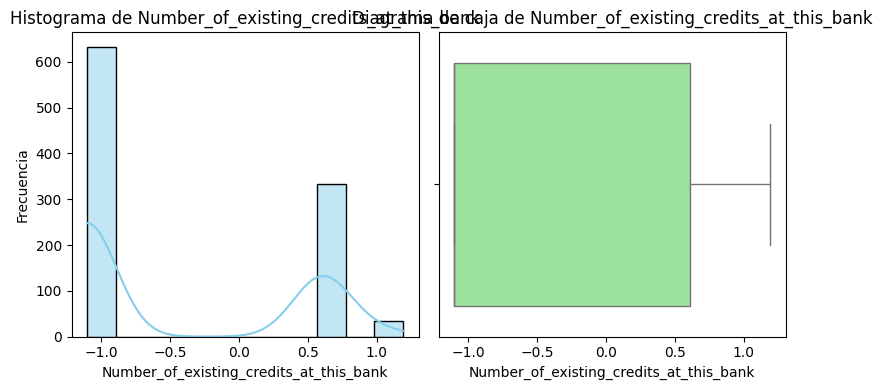

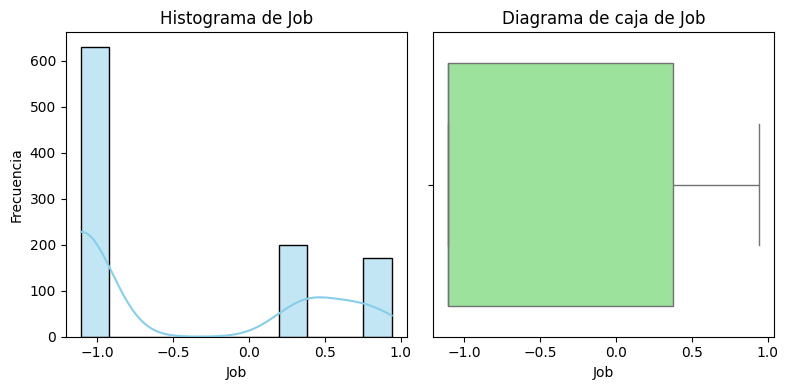

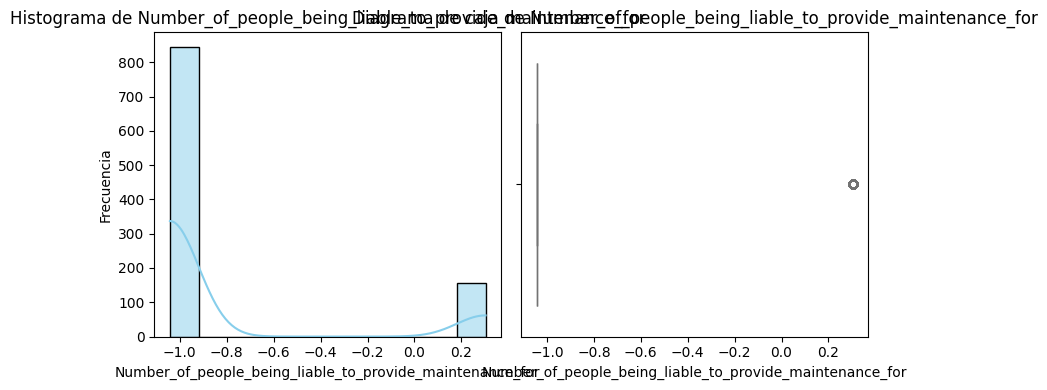

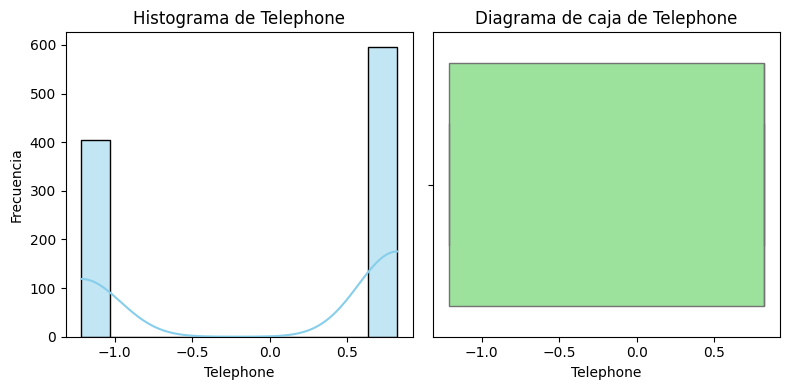

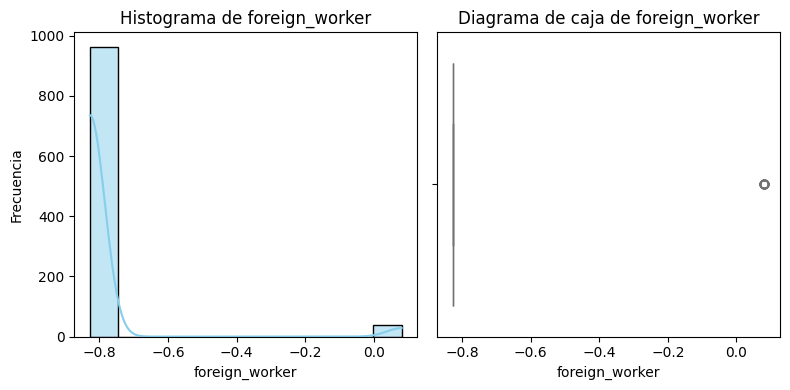

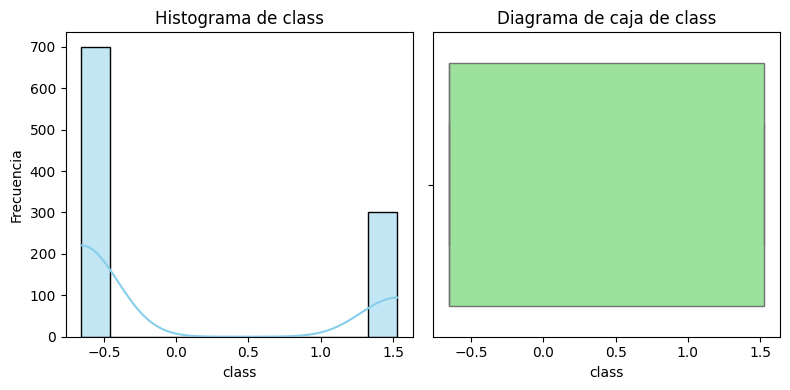

In [ ]:
visualize_numerical(df, numerical_cols)
visualize_categorical(df, categorical_cols)